In [1]:
# Библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Чтоб числа вещественные выводились норм
pd.options.display.float_format ='{:,.2f}'.format

In [3]:
# Будем использовать только один набор, так как он содержит в себе данные с 2019 и 2020 годов.
data = pd.read_csv('database/agents2021.csv')
data

,Unnamed: 0,Наименование ДП,"Макс. ПДЗ за 2019 год, дней","Сред. ПДЗ за 2019 год, дней","Кол-во просрочек свыше 5-ти дней за 2019 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.","Кол-во раз ПДЗ за 2019 год, шт.","Макс. ПДЗ за 2020 год, дней","Сред. ПДЗ за 2020 год, дней","Кол-во просрочек свыше 5-ти дней за 2020 год, шт.",...,Факт 7,Факт 12,Факт 14,Факт 15,Факт 16,Итого,ПДЗ 1-30,ПДЗ 31-90,ПДЗ 91-365,ПДЗ более 365
0,0,0,0,0.00,0,0.00,0,10,6.40,4,...,nan,nan,nan,nan,nan,5.00,0,0,1,1
1,1,2,7,5.50,1,"132,825.30",2,6,5.33,2,...,nan,nan,nan,nan,nan,25.00,0,0,1,1
2,2,4,2,2.00,0,0.00,2,1,1.00,0,...,nan,nan,nan,nan,nan,10.00,0,0,0,0
3,3,5,0,0.00,0,0.00,0,21,17.67,5,...,nan,nan,nan,nan,nan,20.00,0,0,0,1
4,4,6,0,0.00,0,0.00,0,0,0.00,0,...,nan,nan,nan,nan,nan,20.00,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,320,522,0,0.00,0,0.00,0,4,1.75,0,...,nan,nan,nan,nan,nan,10.00,1,0,0,0
321,321,523,0,0.00,0,0.00,0,0,0.00,0,...,nan,nan,nan,nan,nan,5.00,0,0,0,0
322,322,525,0,0.00,0,0.00,0,0,0.00,0,...,nan,nan,nan,nan,nan,65.00,1,0,0,0
323,323,527,0,0.00,0,0.00,0,0,0.00,0,...,nan,nan,nan,nan,nan,5.00,0,0,0,0


Загрузилось норм. Приступаем к анализу.

Рассмотрим колоники Факт. В них содержаться пропуски - обработаем их.

In [4]:
#Что в колонках Факт?
for col in data.columns[95:131]:
    print(f'В колонке {col}: {325-data[col].isna().sum()} значений и {data[col].isna().sum()} пропусков')
# Получаестся:
# - колонки фактов 20, 21, 56, 15 и 16 - пустые. 
# - колонки 29, 49, 54, 59, 60 - от 40 объектов имеют этот признак со значением 10 в 29 и 5 в остальных.
# - остальные колоники - этот признак имеет всего до 13 объектов из 325 - вряд ли он оказывает существенное влияние,
# но надо проверить так как его вес у этих объектов очень большой 

В колонке Факт. 20: 0 значений и 325 пропусков
В колонке Факт. 21: 0 значений и 325 пропусков
В колонке Факт.32: 2 значений и 323 пропусков
В колонке Факт.31: 13 значений и 312 пропусков
В колонке Факт.23: 5 значений и 320 пропусков
В колонке Факт 24: 2 значений и 323 пропусков
В колонке Факт 27: 1 значений и 324 пропусков
В колонке Факт 33: 6 значений и 319 пропусков
В колонке Факт 28: 2 значений и 323 пропусков
В колонке Факт 29: 40 значений и 285 пропусков
В колонке Факт 30: 4 значений и 321 пропусков
В колонке Факт 40: 1 значений и 324 пропусков
В колонке Факт 41: 1 значений и 324 пропусков
В колонке Факт 42: 2 значений и 323 пропусков
В колонке Факт 46: 4 значений и 321 пропусков
В колонке Факт 48: 2 значений и 323 пропусков
В колонке Факт 49: 226 значений и 99 пропусков
В колонке Факт 50: 5 значений и 320 пропусков
В колонке Факт 51: 10 значений и 315 пропусков
В колонке Факт 54: 146 значений и 179 пропусков
В колонке Факт 55: 7 значений и 318 пропусков
В колонке Факт 56: 0 значе

In [5]:
# Колонки Факт имеют разный формат написания названия. Приведем к единому.
data = data.rename(columns = {'Факт.32': 'Факт 32', 
                              'Факт.31': 'Факт 31',
                              'Факт.23': 'Факт 23', 
                              'Факт. 20': 'Факт 20',
                              'Факт. 21': 'Факт 21'})

In [6]:
# Посмотрим итоговую сумму по колонкам с фактами
for col in data.columns[95:131]:
    if data[col].sum()>0:
        print(f'{col} Сумма {data[col].sum()}  для {325-data[col].isna().sum()} знач. => (1 = {data[col].sum()/(325-data[col].isna().sum())})')

Факт 32 Сумма 80.0  для 2 знач. => (1 = 40.0)
Факт 31 Сумма 520.0  для 13 знач. => (1 = 40.0)
Факт 23 Сумма 150.0  для 5 знач. => (1 = 30.0)
Факт 24 Сумма 60.0  для 2 знач. => (1 = 30.0)
Факт 27 Сумма 30.0  для 1 знач. => (1 = 30.0)
Факт 33 Сумма 180.0  для 6 знач. => (1 = 30.0)
Факт 28 Сумма 60.0  для 2 знач. => (1 = 30.0)
Факт 29 Сумма 400.0  для 40 знач. => (1 = 10.0)
Факт 30 Сумма 120.0  для 4 знач. => (1 = 30.0)
Факт 40 Сумма 50.0  для 1 знач. => (1 = 50.0)
Факт 41 Сумма 50.0  для 1 знач. => (1 = 50.0)
Факт 42 Сумма 160.0  для 2 знач. => (1 = 80.0)
Факт 46 Сумма 200.0  для 4 знач. => (1 = 50.0)
Факт 48 Сумма 20.0  для 2 знач. => (1 = 10.0)
Факт 49 Сумма 1130.0  для 226 знач. => (1 = 5.0)
Факт 50 Сумма 50.0  для 5 знач. => (1 = 10.0)
Факт 51 Сумма 50.0  для 10 знач. => (1 = 5.0)
Факт 54 Сумма 730.0  для 146 знач. => (1 = 5.0)
Факт 55 Сумма 35.0  для 7 знач. => (1 = 5.0)
Факт 57 Сумма 20.0  для 1 знач. => (1 = 20.0)
Факт 58 Сумма 33.0  для 11 знач. => (1 = 3.0)
Факт 59 Сумма 440.0  

In [7]:
# Удалю колонки фактов 20, 21, 56, 15 и 16 - пустые.
data = data.drop(['Факт 20', 'Факт 21', 'Факт 56', 'Факт 15', 'Факт 16'], axis=1)

In [8]:
# В остальных фактах заполню NaN - 0 (раз фактов нет)
for col in data.columns[95:126]:
    if 'Факт' in col:
        data[col] = data[col].fillna(0)

In [9]:
# Пропуски в колонке Итого, где пропуски - это значит все факты имеют значение 0 => проверим это и заполним пропуски 0 
data[data['Итого'].isna()][['Факт 32', 'Факт 31', 'Факт 23', 'Факт 24', 'Факт 27', 'Факт 33',
       'Факт 28', 'Факт 29', 'Факт 30', 'Факт 40', 'Факт 41', 'Факт 42',
       'Факт 46', 'Факт 48', 'Факт 49', 'Факт 50', 'Факт 51', 'Факт 54',
       'Факт 55', 'Факт 57', 'Факт 58', 'Факт 59', 'Факт 60', 'Факт 37',
       'Факт 39', 'Факт 1', 'Факт 2', 'Факт 3', 'Факт 7', 'Факт 12',
       'Факт 14']].sum().sum()

0.0

In [10]:
# Запоним пропуски в итого и переименуем в Итого Факт, чтоб было понятно чего это Итого
data['Итого'] = data['Итого'].fillna(0)
data = data.rename(columns = {'Итого': 'Итого Факт'})

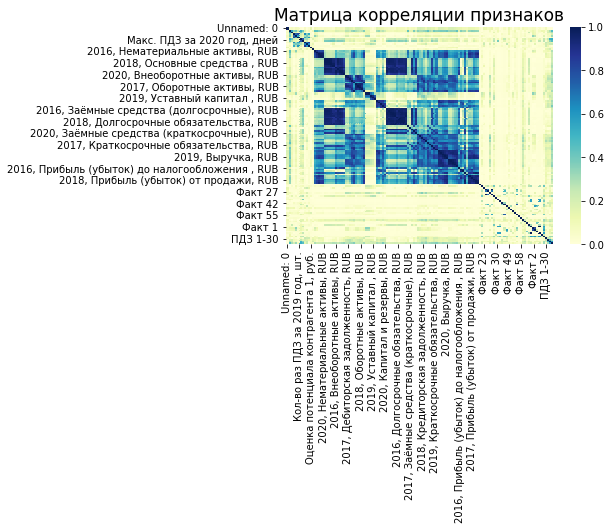

In [11]:
# Построим матрицу корреляции
heatmap = sns.heatmap(data.corr().abs(), vmin=0, vmax=1, cmap="YlGnBu")
heatmap.set_title('Матрица корреляции признаков', fontsize=17); 

Встречаются сильно скоррелированные между собой признаки. Это финансовые показатели деятельности контрогентов. Их самих не планирую включать в датасет для модели. Они будут использоваться для расчета различных признаков.
Так же корреляция по задолжностям за 2019 и 2020 года в начале датасета. Но в этом случае логично. 

### Создадим target переменные:

Количество оплачивающих своевременно очень сильно меняет от года к году.

In [12]:
# в 2019 году
data[(data['Сред. ПДЗ за 2019 год, дней'] ==0)]['Наименование ДП'].count()

130

In [13]:
# в 2020 году
data[(data['Сред. ПДЗ за 2020 год, дней'] ==0)]['Наименование ДП'].count()

78

In [14]:
# в 2021 году
data[(data['ПДЗ 1-30'] ==0) & (data['ПДЗ 31-90'] ==0) & (data['ПДЗ 91-365'] ==0) &  (data['ПДЗ более 365'] ==0)]['Наименование ДП'].count()

214

В 2021 гораздо меньше контрагентов имеют задолженность. Больше всего в 2020, что и подтверждает экономическая ситуация в мире, 20 год был самый такой напряженный.

Бинарные переменные 'есть - нет' задолжности

In [15]:
data['target_2021 01'] = data['ПДЗ 1-30'] + data['ПДЗ 31-90'] + \
                              data['ПДЗ 91-365'] + data['ПДЗ более 365']
data['target_2021 01'] = data['target_2021 01'].apply(lambda x: 0 if x == 0 else 1)

In [16]:
data['target_2019 01'] = data['Макс. ПДЗ за 2019 год, дней'].apply(lambda x: 0 if x == 0 else 1)
data['target_2020 01'] = data['Макс. ПДЗ за 2020 год, дней'].apply(lambda x: 0 if x == 0 else 1)

Переменные для мультиклассовой классификации

Есть задолженность и какой срок: 1(1-30), 2(свыше 31) или нет 0

In [17]:
def target_012(row):
    if row['ПДЗ более 365'] == 1:
        return 2
    elif row['ПДЗ 91-365'] == 1:
        return 2
    elif row['ПДЗ 31-90'] == 1:
        return 2
    elif row['ПДЗ 1-30'] == 1:
        return 1
    else:
        return 0
    
data['target_2021 012'] = data.apply(lambda row: target_012(row), axis=1)

In [18]:
def separation_periods_012(num):
    """Функция расчета периода задолженности"""
    if num == 0:
        return 0
    elif num < 31:
        return 1
    else:
        return 2
    
data['target_2019 012'] = data['Макс. ПДЗ за 2019 год, дней'].apply(separation_periods_012)

data['target_2020 012'] = data['Макс. ПДЗ за 2020 год, дней'].apply(separation_periods_012)

Есть задолженность и какой срок: 1(1-30), 2(31-90), 3(31-365), 4(от 366) или нет 0

In [19]:
def target_01234(row):
    if row['ПДЗ более 365'] == 1:
        return 4
    elif row['ПДЗ 91-365'] == 1:
        return 3
    elif row['ПДЗ 31-90'] == 1:
        return 2
    elif row['ПДЗ 1-30'] == 1:
        return 1
    else:
        return 0
    
data['target_2021 01234'] = data.apply(lambda row: target_01234(row), axis=1)

In [20]:
def separation_periods(num):
    """Функция расчета периода задолженности"""
    if num == 0:
        return 0
    elif num < 31:
        return 1
    elif num < 91:
        return 2
    elif num < 366:
        return 3
    else:
        return 4

    

data['target_2019 01234'] = data['Макс. ПДЗ за 2019 год, дней'].apply(separation_periods)

data['target_2020 01234'] = data['Макс. ПДЗ за 2020 год, дней'].apply(separation_periods)

### Приступим к анализу и формированию признаков

**Оценка потенциала контрагента**

In [21]:
# Что это - не поняла
data[['Оценка потенциала контрагента 1, руб.', 'Оценка потенциала контрагента 2, руб.']].sample(3)

,"Оценка потенциала контрагента 1, руб.","Оценка потенциала контрагента 2, руб."
65,"25,477,707.01","25,477,707.01"
150,0.00,"63,694,267.52"
258,"6,369,426.75","6,369,426.75"


In [22]:
# переименуем в более коротное название, так как все равно не понятно какой именно потенциал
data = data.rename(columns = {'Оценка потенциала контрагента 1, руб.': 'ОПК 1',
                              'Оценка потенциала контрагента 2, руб.': 'ОПК 2'})

<AxesSubplot:ylabel='Frequency'>

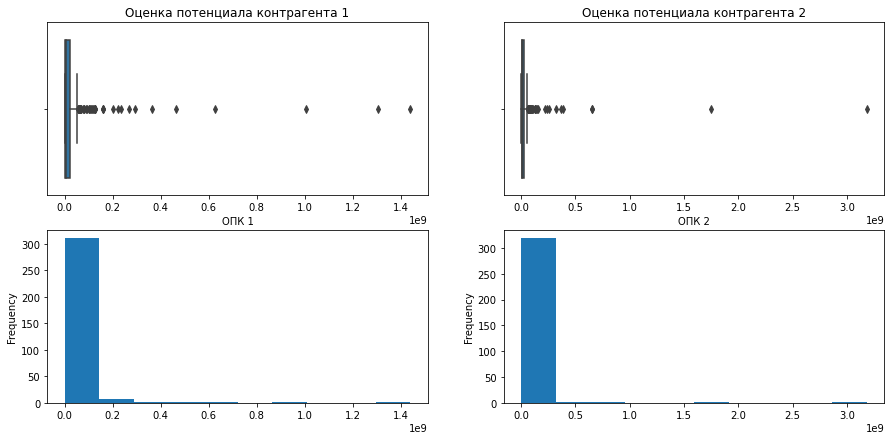

In [23]:
plt.figure(figsize=(15, 7))

plt.subplot(2, 2, 1)
plt.title('Оценка потенциала контрагента 1')
sns.boxplot(x='ОПК 1',data=data )
plt.subplot(2, 2, 2)
plt.title('Оценка потенциала контрагента 2')
sns.boxplot(x='ОПК 2',data=data )
plt.subplot(2, 2, 3)
data['ОПК 1'].plot(kind='hist')
plt.subplot(2, 2, 4)
data['ОПК 2'].plot(kind='hist')

Два этих признака имеют примерно одинаковое распределение (смещенное с хвостом справа). Необходимо его немного привести к нормальному - логорифмировать.

In [24]:
data['ОПК 1'] = np.log(data['ОПК 1']+1)
data['ОПК 2'] = np.log(data['ОПК 2']+1)

<AxesSubplot:ylabel='Frequency'>

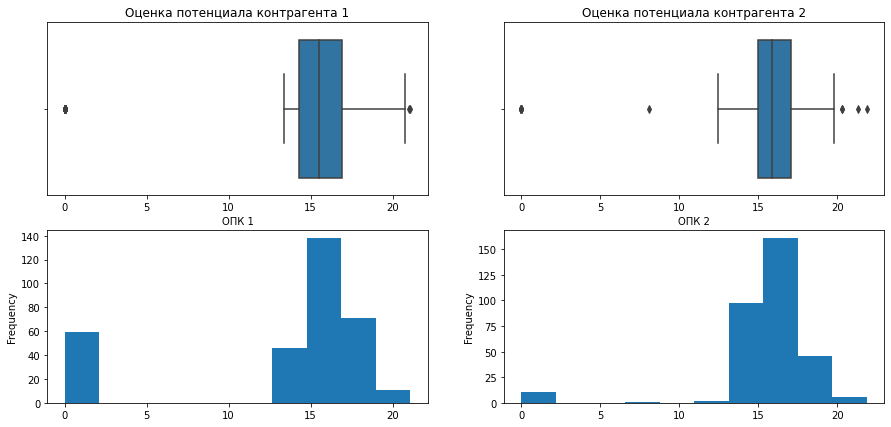

In [25]:
plt.figure(figsize=(15, 7))

plt.subplot(2, 2, 1)
plt.title('Оценка потенциала контрагента 1')
sns.boxplot(x='ОПК 1',data=data )
plt.subplot(2, 2, 2)
plt.title('Оценка потенциала контрагента 2')
sns.boxplot(x='ОПК 2',data=data )
plt.subplot(2, 2, 3)
data['ОПК 1'].plot(kind='hist')
plt.subplot(2, 2, 4)
data['ОПК 2'].plot(kind='hist')

In [26]:
data[['ОПК 1', 'ОПК 2']].corr()

,ОПК 1,ОПК 2
ОПК 1,1.00,0.33
ОПК 2,0.33,1.00


Стало гораздо лучше. Корреляция между ними положительная и небольшая (что хорошо).

**Финансовые показатели деятельности контрагентов**

Просто брать фактические суммы не имеет смысла. Так как размер выручки или задолжности сами по себе не сможет показать платежеспособность контрагента. 

Сформируем новые признаки на основании имеющихся показателей.

На основании "Методоглогических указаний по проведению анализа финансового состояния организаций" (приказ ФСФО .от 23 января 2001г. № 16) в качестве признаков расчитаем коэффициенты платежеспособности и финансовой устойчивсти.

Платежеспособность характеризует возможность организации своевременно расплачиваться по своим обязательствам.

In [27]:
def features_financial_ratios(data, year):
    """
    Расчет показателей, характеризующих различные аспекты деятельности организации:
    1. Общие показатели:
    К_1 - среднемесячная выручка;
    
    2. Расчет показателей платежеспособности и финансовой устойчивости:
    К_4 - степень платежеспособности общая;
    К_5 - коэффициент задолженности по кредитам банков и займам;
    К_6 - коэффициент задолженности другим организациям;
    К_9 - степень платежеспособности по текущим обязательствам;
    К_10 - коэффициент покрытия текущих обязательств оборотными активами;
    К_11 - собственный капитал в обороте;
    К_12 - доля собственного капитала в оборотных средствах (коэффициент обеспеченности собственными средствами);
    К_13 - коэффициент автономии (финансовой независимости).
    
    3. Показатели эффективности использования капитала
    К_14 - коэффициент обеспеченности оборотными средствами;
    К_17 - рентабельность оборотного капитала;
    К_18 - рентабельность продаж;
    К_20 - эффективность внеоборотного капитала (фондоотдача);
    """
    for i in year:
        data['{}, f1_590'.format(i)] = (data['{}, Заёмные средства (долгосрочные), RUB'.format(i)] 
                                     + data['{}, Долгосрочные обязательства, RUB'.format(i)])
        
        data['{}, f1_690'.format(i)] = (data['{}, Заёмные средства (краткосрочные), RUB'.format(i)] 
                                     + data['{}, Кредиторская задолженность, RUB'.format(i)] 
                                     + data['{}, Краткосрочные обязательства, RUB'.format(i)])
                
        data['{}, f1_290'.format(i)] = (data['{}, Дебиторская задолженность, RUB'.format(i)]
                                     + data['{}, Оборотные активы, RUB'.format(i)])
        
        data['{}, f1_490'.format(i)] = (data['{}, Капитал и резервы, RUB'.format(i)]
                                     + data['{}, Уставный капитал , RUB'.format(i)])
        
        data['{}, f1_190'.format(i)] = (data['{}, Нематериальные активы, RUB'.format(i)] 
                                     + data['{}, Основные средства , RUB'.format(i)] 
                                     + data['{}, Внеоборотные активы, RUB'.format(i)])
        
        
        data['K_1 {}'.format(i)] = data['{}, Выручка, RUB'.format(i)] / 12
        
        data['K_4 {}'.format(i)] = (data['{}, f1_590'.format(i)] + data['{}, f1_690'.format(i)]) / (data['K_1 {}'.format(i)]+1)
        
        data['K_5 {}'.format(i)] = (data['{}, Заёмные средства (краткосрочные), RUB'.format(i)]
                                  + data['{}, f1_590'.format(i)]) / (data['K_1 {}'.format(i)]+1)
        
        data['K_6 {}'.format(i)] =  data['{}, Кредиторская задолженность, RUB'.format(i)] / (data['K_1 {}'.format(i)]+1)
        
        data['K_9 {}'.format(i)] = data['{}, f1_690'.format(i)] / (data['K_1 {}'.format(i)]+1)
        
        data['K_10 {}'.format(i)] = data['{}, f1_290'.format(i)] / (data['{}, f1_690'.format(i)]+1)
                                           
        data['K_11 {}'.format(i)] = data['{}, f1_490'.format(i)] - data['{}, f1_190'.format(i)]
        
        data['K_12 {}'.format(i)] = (data['{}, f1_490'.format(i)] - data['{}, f1_190'.format(i)]) / (data['{}, f1_290'.format(i)]+1)
        
        data['K_13 {}'.format(i)] = data['{}, f1_490'.format(i)] / (data['{}, f1_190'.format(i)] + data['{}, f1_290'.format(i)]+1)
        
        data['K_14 {}'.format(i)] = data['{}, f1_290'.format(i)] / (data['K_1 {}'.format(i)]+1)
        
        data['K_17 {}'.format(i)] = data['{}, Прибыль (убыток) до налогообложения , RUB'.format(i)]*0.8 / (data['{}, f1_290'.format(i)]+1)
        # За минусом налога на прибыль
        
        data['K_18 {}'.format(i)] = data['{}, Прибыль (убыток) от продажи, RUB'.format(i)] / (data['{}, Выручка, RUB'.format(i)]+1)
        
        data['K_20 {}'.format(i)] = data['K_1 {}'.format(i)] / (data['{}, f1_190'.format(i)]+1)
    
    
    return data

In [28]:
# Доавим признаки платежеспособности
data = features_financial_ratios(data, [2016, 2017, 2018, 2019, 2020])

In [29]:
data.sample(5)

,Unnamed: 0,Наименование ДП,"Макс. ПДЗ за 2019 год, дней","Сред. ПДЗ за 2019 год, дней","Кол-во просрочек свыше 5-ти дней за 2019 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.","Кол-во раз ПДЗ за 2019 год, шт.","Макс. ПДЗ за 2020 год, дней","Сред. ПДЗ за 2020 год, дней","Кол-во просрочек свыше 5-ти дней за 2020 год, шт.",...,K_6 2020,K_9 2020,K_10 2020,K_11 2020,K_12 2020,K_13 2020,K_14 2020,K_17 2020,K_18 2020,K_20 2020
67,67,116,0,0.00,0,0.00,0,0,0.00,0,...,0.79,2.09,1.82,"6,937,942,038.22",0.44,0.53,3.80,0.16,0.06,1.38
130,130,207,14,5.07,21,"6,431,477.10",58,26,5.04,20,...,1.59,3.27,1.25,"-591,082.80",-0.02,0.24,4.09,0.09,0.03,0.70
117,117,189,8,2.47,2,"467,155.31",55,8,3.50,11,...,1.44,3.58,0.94,"-8,713,375.80",-0.04,0.03,3.35,0.00,0.01,3.95
68,68,120,0,0.00,0,0.00,0,1,1.00,0,...,2.66,6.82,1.16,"76,558,598.73",0.13,0.28,7.89,0.14,0.11,0.59
90,90,148,0,0.00,0,0.00,0,8,3.37,8,...,0.53,1.09,5.68,"504,031,847.13",0.53,0.61,6.21,0.20,0.12,0.76


**Посмотрим коэффициенты и попробуем убрать аномалии**

In [30]:
# К_1 - среднемесячная выручка
data[['K_1 2016', 'K_1 2017', 'K_1 2018', 'K_1 2019', 'K_1 2020']].describe()

,K_1 2016,K_1 2017,K_1 2018,K_1 2019,K_1 2020
count,325.00,325.00,325.00,325.00,325.00
mean,"437,567,594.32","497,165,373.18","685,484,182.75","786,485,689.37","762,989,845.34"
std,"1,860,833,565.53","2,105,436,801.53","2,778,505,924.41","3,351,016,128.46","3,346,772,334.31"
min,0.00,0.00,0.00,0.00,0.00
25%,"3,321,284.50","6,278,715.50","14,031,050.96","17,844,214.44","19,047,717.62"
50%,"24,741,666.67","32,817,356.69","45,251,910.83","50,625,371.55","51,651,433.12"
75%,"101,427,070.06","135,605,307.86","184,198,673.04","210,601,698.51","224,406,634.82"
max,"22,443,143,789.81","24,199,638,906.58","32,328,124,681.53","46,610,631,263.27","49,039,664,915.07"


array([[<AxesSubplot:title={'center':'K_1 2016'}>,
        <AxesSubplot:title={'center':'K_1 2017'}>],
       [<AxesSubplot:title={'center':'K_1 2018'}>,
        <AxesSubplot:title={'center':'K_1 2019'}>],
       [<AxesSubplot:title={'center':'K_1 2020'}>, <AxesSubplot:>]],
      dtype=object)

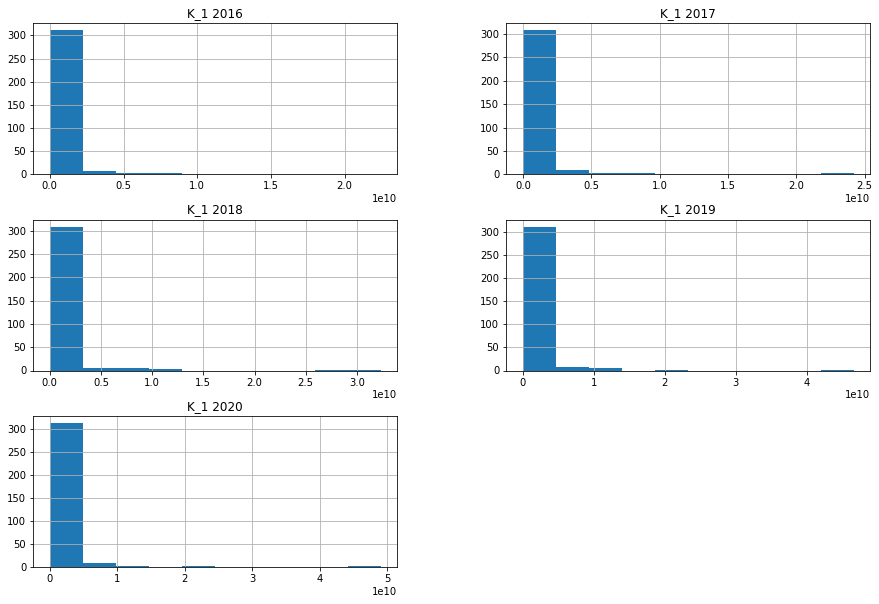

In [31]:
# распределение среднемесячной выручки не нормальное. Попробуем логорифмировать.
data[['K_1 2016', 'K_1 2017', 'K_1 2018', 'K_1 2019', 'K_1 2020']].hist(figsize=(15, 10))


array([[<AxesSubplot:title={'center':'K_1 2016'}>,
        <AxesSubplot:title={'center':'K_1 2017'}>],
       [<AxesSubplot:title={'center':'K_1 2018'}>,
        <AxesSubplot:title={'center':'K_1 2019'}>],
       [<AxesSubplot:title={'center':'K_1 2020'}>, <AxesSubplot:>]],
      dtype=object)

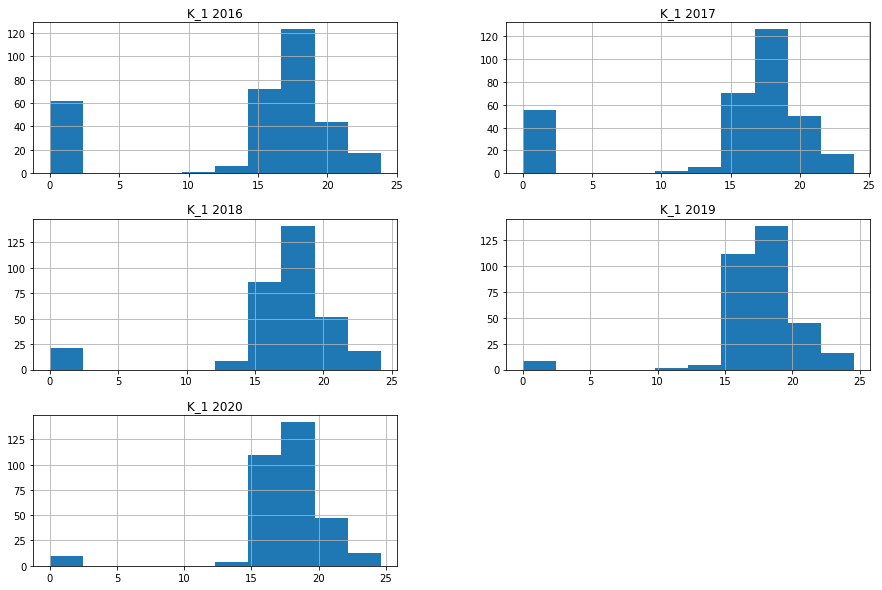

In [32]:
for col in ['K_1 2016', 'K_1 2017', 'K_1 2018', 'K_1 2019', 'K_1 2020']:
    data[col] = np.log(data[col]+1)
data[['K_1 2016', 'K_1 2017', 'K_1 2018', 'K_1 2019', 'K_1 2020']].hist(figsize=(15, 10))
# Стало получше

In [33]:
# К_4 - степень платежеспособности общая
data[['K_4 2016', 'K_4 2017', 'K_4 2018', 'K_4 2019', 'K_4 2020']].describe()

,K_4 2016,K_4 2017,K_4 2018,K_4 2019,K_4 2020
count,325.00,325.00,325.00,325.00,325.00
mean,"8,632,009.08","5,036,980.82","23,746,163.70","609,568,131.57","1,727,998,821.87"
std,"94,797,415.65","59,399,098.29","376,696,005.88","10,926,686,040.34","30,604,013,429.46"
min,0.00,0.00,0.00,0.00,0.00
25%,1.53,2.08,3.05,3.52,3.84
50%,4.87,5.51,6.20,6.57,7.13
75%,12.05,11.87,12.76,13.09,15.58
max,"1,384,094,904.46","886,467,515.92","6,728,755,414.01","196,983,929,936.31","551,663,007,643.31"


In [34]:
# посмотрим на этих аномальных контрагентов
data[data['K_4 2017'] > 100][['2017, Заёмные средства (долгосрочные), RUB',
                             '2017, Долгосрочные обязательства, RUB',
                              '2017, Заёмные средства (краткосрочные), RUB',
                              '2017, Кредиторская задолженность, RUB',
                              '2017, Краткосрочные обязательства, RUB',
                              '2017, Выручка, RUB',
                              'K_4 2017', 'K_4 2018', 'K_4 2019']]

,"2017, Заёмные средства (долгосрочные), RUB","2017, Долгосрочные обязательства, RUB","2017, Заёмные средства (краткосрочные), RUB","2017, Кредиторская задолженность, RUB","2017, Краткосрочные обязательства, RUB","2017, Выручка, RUB",K_4 2017,K_4 2018,K_4 2019
9,0.00,0.00,0.00,"7,136,992,356.69","7,738,454,777.07","1,714,094,267.52",104.14,84.15,57.93
18,"7,072,044,585.99","61,013,635,668.79",0.00,"4,753,982,802.55","5,062,766,878.98","6,156,610,828.03",151.84,89.89,164.24
29,"10,007,145,222.93","11,190,498,726.11","13,958,598.73","57,248,783,439.49","57,740,483,439.49","16,177,416,560.51",101.03,22.48,22.88
31,0.00,"24,304,089,171.97","276,670,063.69","12,563,975,159.24","13,381,850,955.41","6,036,913,375.80",100.44,86.93,159.74
37,"23,894,282,165.61","55,870,895,541.40","3,934,987,261.15","3,296,994,267.52","10,851,614,012.74","4,734,052,866.24",248.03,124.90,0.00
41,"122,038,216.56","122,377,070.06","107,028,662.42","213,997,452.23","321,026,114.65",0.00,"886,467,515.92","938,147,133.76","6,659,235.67"
120,"1,038,017,115,286.62","1,058,395,739,490.45","1,528,898,726.11","27,190,018,471.34","28,974,643,312.10","8,767,150,955.41","2,948.42",276.64,177.48
157,"5,908,258,598.73","8,492,220,382.17","27,918,700,636.94","3,998,280,254.78","32,065,517,834.39","2,414,109,554.14",389.62,49.54,44.75
205,0.00,"2,668,152.87",0.00,"159,771,974.52","421,291,719.75",0.00,"583,731,847.13","1,536.51","4,755.46"
223,0.00,"-110,191.08","2,074,178,980.89","3,183,444,585.99","5,265,285,350.32","1,099,850,955.41",114.81,721.76,178.96


В основном одна и та же картина - отсутсвие выручки (или размер ее гораздо меньше, чем долги) на фоне долговых обязательств. То же можно сделать отсечку на 700, чтоб меньше путать модель. 

In [35]:
for col in ['K_4 2016', 'K_4 2017', 'K_4 2018', 'K_4 2019', 'K_4 2020']:
    data[col] = data[col].apply(lambda x: x if x < 700 else 700)

In [36]:
# К_5 - коэффициент задолженности по кредитам банков и займам
data[['K_5 2016', 'K_5 2017', 'K_5 2018', 'K_5 2019', 'K_5 2020']].describe()

,K_5 2016,K_5 2017,K_5 2018,K_5 2019,K_5 2020
count,325.00,325.00,325.00,325.00,325.00
mean,"3,108,967.66","1,571,730.45","1,228,034.76","568,604,586.67","1,613,067,912.98"
std,"41,396,551.78","21,316,871.39","19,704,169.29","10,250,611,826.27","29,076,923,282.75"
min,-0.00,-0.00,-0.00,0.00,0.00
25%,0.00,0.00,0.05,0.24,0.31
50%,0.42,0.57,0.97,1.18,1.32
75%,3.07,2.93,3.73,3.93,4.42
max,"662,245,222.93","351,443,949.04","352,273,885.35","184,795,535,668.79","524,191,856,687.90"


In [37]:
# посмотрим на этих аномальных контрагентов
data[data['K_5 2016'] > 50][['2016, Заёмные средства (долгосрочные), RUB',
                            '2016, Долгосрочные обязательства, RUB',
                             '2016, Заёмные средства (краткосрочные), RUB',
                             '2016, Выручка, RUB',
                             'K_5 2016', 'K_5 2017', 'K_5 2018']]

,"2016, Заёмные средства (долгосрочные), RUB","2016, Долгосрочные обязательства, RUB","2016, Заёмные средства (краткосрочные), RUB","2016, Выручка, RUB",K_5 2016,K_5 2017,K_5 2018
37,"19,348,611,464.97","46,424,588,535.03","10,129,608,280.25","6,760,121,019.11",134.74,212.17,61.27
40,"196,433,121.02","199,535,947,770.70","575,796.18","47,308,505,095.54",50.66,46.10,43.54
41,"122,038,216.56","122,378,980.89","101,705,732.48",0.00,"346,122,929.94","351,443,949.04","352,273,885.35"
71,"177,510,799,363.06","217,477,469,426.75","4,486,908,917.20","72,607,452,866.24",66.02,0.00,55.17
120,"744,162,524,840.76","755,096,672,611.46","1,086,092,356.69","6,748,482,165.61","2,667.88","2,871.55",253.46
157,"22,798,926,751.59","23,339,121,019.11",636.94,"22,214,012.74","24,923.74",210.36,43.50
178,"54,905,095.54","54,905,095.54","1,966,878.98","17,721,656.05",75.69,6.64,7.22
184,"24,153,160,509.55","26,262,482,165.61","50,076,140,127.39","7,705,137,579.62",156.51,47.54,20.02
187,"127,742,636,942.68","131,022,614,012.74",0.00,"41,907,224,203.82",74.10,23.66,12.08
205,0.00,"884,713.38",0.00,0.00,"884,713.38","2,668,152.87","1,264.43"


Так как знаменатель у нас выручка у этих коэввииентов, то тут та же причина, что и у К_4 коэффициента, только значения другие. Возможно оптимально заменить на 80. 

In [38]:
for col in ['K_5 2016', 'K_5 2017', 'K_5 2018', 'K_5 2019', 'K_5 2020']:
    data[col] = data[col].apply(lambda x: x if x < 80 else 80)

In [39]:
# К_6 - коэффициент задолженности другим организациям
data[['K_6 2016', 'K_6 2017', 'K_6 2018', 'K_6 2019', 'K_6 2020']].describe()

,K_6 2016,K_6 2017,K_6 2018,K_6 2019,K_6 2020
count,325.00,325.00,325.00,325.00,325.00
mean,"1,650,686.61","1,164,114.08","11,092,214.85","20,389,372.11","57,256,774.76"
std,"19,109,418.42","14,792,015.92","187,051,090.40","337,810,306.13","805,516,485.72"
min,0.00,0.00,0.00,0.00,0.00
25%,0.52,0.59,0.93,1.10,1.13
50%,1.42,1.54,1.75,1.76,1.98
75%,3.40,3.51,3.48,3.75,3.71
max,"263,023,566.88","213,997,452.23","3,364,377,707.01","6,066,140,127.39","13,674,061,146.50"


In [40]:
# посмотрим на этих аномальных контрагентов
data[data['K_6 2016'] > 50][['2016, Кредиторская задолженность, RUB',
                             '2016, Выручка, RUB', 
                             'K_6 2016', 'K_6 2017', 'K_6 2018']]

,"2016, Кредиторская задолженность, RUB","2016, Выручка, RUB",K_6 2016,K_6 2017,K_6 2018
9,"7,351,321,656.05","995,016,560.51",88.66,49.96,40.04
18,"5,507,407,006.37","209,166,242.04",315.96,9.27,23.86
41,"220,492,356.69",0.00,"220,492,356.69","213,997,452.23","238,945,222.93"
157,"1,759,318,471.34","22,214,012.74",950.38,19.87,2.91
198,"8,994,904.46","768,152.87",140.52,2.73,2.09
205,"26,799,363.06",0.00,"26,799,363.06","159,771,974.52",134.80
259,"26,155,414.01",0.00,"26,155,414.01",1.01,1.09
279,"263,023,566.88",0.00,"263,023,566.88","2,947.18","1,384.32"


Тоже, что и у К_4 и К_5

In [41]:
for col in ['K_6 2016', 'K_6 2017', 'K_6 2018', 'K_6 2019', 'K_6 2020']:
    data[col] = data[col].apply(lambda x: x if x < 150 else 150)

In [42]:
# К_9 - степень платежеспособности по текущим обязательствам
data[['K_9 2016', 'K_9 2017', 'K_9 2018', 'K_9 2019', 'K_9 2020']].describe()

,K_9 2016,K_9 2017,K_9 2018,K_9 2019,K_9 2020
count,325.00,325.00,325.00,325.00,325.00
mean,"5,835,983.30","3,797,570.95","22,850,789.03","40,963,716.90","114,930,909.91"
std,"59,691,258.95","47,959,136.27","375,104,508.96","678,739,264.60","1,617,688,278.01"
min,0.00,0.00,0.00,0.00,0.00
25%,1.37,1.71,2.36,2.74,2.92
50%,3.71,4.33,4.82,5.09,5.42
75%,9.10,8.91,9.09,9.78,9.94
max,"721,849,681.53","642,052,229.30","6,728,755,414.01","12,188,394,267.52","27,471,150,955.41"


In [43]:
# посмотрим на этих аномальных контрагентов
data[data['K_9 2016'] > 100][['2016, Заёмные средства (краткосрочные), RUB',
                              '2016, Кредиторская задолженность, RUB',
                              '2016, Краткосрочные обязательства, RUB',
                              '2016, Выручка, RUB',
                              'K_9 2016', 'K_9 2017', 'K_9 2018']]

,"2016, Заёмные средства (краткосрочные), RUB","2016, Кредиторская задолженность, RUB","2016, Краткосрочные обязательства, RUB","2016, Выручка, RUB",K_9 2016,K_9 2017,K_9 2018
9,0.00,"7,351,321,656.05","8,599,043,949.04","995,016,560.51",192.36,104.14,84.15
18,"311,564,331.21","5,507,407,006.37","5,825,687,261.15","209,166,242.04",668.06,19.13,47.92
41,"101,705,732.48","220,492,356.69","322,198,089.17",0.00,"644,396,178.34","642,052,229.30","693,856,050.96"
157,636.94,"1,759,318,471.34","2,363,396,178.34","22,214,012.74","2,227.09",318.04,6.04
184,"50,076,140,127.39","3,716,719,745.22","54,106,212,738.85","7,705,137,579.62",168.04,9.68,3.51
198,0.00,"8,994,904.46","9,185,987.26","768,152.87",284.02,5.54,4.21
205,0.00,"26,799,363.06","448,776,433.12",0.00,"475,575,796.18","581,063,694.27",272.08
223,"1,884,629,299.36","2,939,657,961.78","4,830,595,541.40","823,663,694.27",140.66,114.81,721.72
259,0.00,"26,155,414.01","28,711,464.97",0.00,"54,866,878.98",3.77,2.22
279,0.00,"263,023,566.88","458,826,114.65",0.00,"721,849,681.53","14,765.19","2,792.26"


In [44]:
for col in ['K_9 2016', 'K_9 2017', 'K_9 2018', 'K_9 2019', 'K_9 2020']:
    data[col] = data[col].apply(lambda x: x if x < 150 else 150)

In [45]:
# К_10 - коэффициент покрытия текущих обязательств оборотными активами
data[['K_10 2016', 'K_10 2017', 'K_10 2018', 'K_10 2019', 'K_10 2020']].describe()

,K_10 2016,K_10 2017,K_10 2018,K_10 2019,K_10 2020
count,325.00,325.00,325.00,325.00,325.00
mean,79.76,2.02,1.53,1.67,1.76
std,863.08,9.30,1.96,2.22,3.77
min,0.00,0.00,0.00,0.00,0.00
25%,0.60,0.60,0.75,0.80,0.80
50%,0.91,0.91,1.02,1.04,1.06
75%,1.46,1.57,1.56,1.69,1.65
max,"12,738.85",159.60,21.36,26.68,55.83


In [46]:
# посмотрим на этих аномальных контрагентов
data[data['K_10 2016'] > 10][['2016, Дебиторская задолженность, RUB',
                              '2016, Оборотные активы, RUB',
                              '2016, Заёмные средства (краткосрочные), RUB',
                              '2016, Кредиторская задолженность, RUB',
                              '2016, Краткосрочные обязательства, RUB',
                              '2016, Выручка, RUB',
                              'K_10 2016', 'K_10 2017', 'K_10 2018']]

,"2016, Дебиторская задолженность, RUB","2016, Оборотные активы, RUB","2016, Заёмные средства (краткосрочные), RUB","2016, Кредиторская задолженность, RUB","2016, Краткосрочные обязательства, RUB","2016, Выручка, RUB",K_10 2016,K_10 2017,K_10 2018
90,"86,943,949.04","246,146,496.82",636.94,"12,779,617.83","14,420,382.17","541,807,006.37",12.25,1.84,4.88
183,"6,369.43","6,369.43",0.00,0.00,0.00,0.00,"12,738.85",0.69,0.67
192,0.00,"6,369.43",0.00,0.00,0.00,0.00,"6,369.43",0.70,0.76
258,"143,743,949.04","167,325,477.71",0.00,"9,213,375.80","11,747,770.70","174,817,834.39",14.84,16.38,15.08
266,"60,677,707.01","315,873,248.41",0.00,"9,916,560.51","10,855,414.01","525,814,012.74",18.13,10.95,4.96
312,0.00,"6,369.43",0.00,0.00,0.00,0.00,"6,369.43",0.79,0.49


In [47]:
for col in ['K_10 2016', 'K_10 2017', 'K_10 2018', 'K_10 2019', 'K_10 2020']:
    data[col] = data[col].apply(lambda x: x if x < 25 else 25)

In [48]:
# К_11 - собственный капитал в обороте
data[['K_11 2016', 'K_11 2017', 'K_11 2018', 'K_11 2019', 'K_11 2020']].describe()

,K_11 2016,K_11 2017,K_11 2018,K_11 2019,K_11 2020
count,325.00,325.00,325.00,325.00,325.00
mean,"-9,636,185,667.81","-11,168,159,172.95","-13,806,094,392.94","-13,946,198,651.64","-16,911,073,908.87"
std,"87,484,086,768.64","115,516,895,122.82","136,624,743,752.46","125,201,638,124.63","138,828,400,624.15"
min,"-1,457,929,882,802.55","-1,990,376,301,273.89","-2,358,238,410,828.02","-2,151,747,539,490.45","-2,331,416,882,802.55"
25%,"-39,279,617.83","-49,180,891.72","-102,107,643.31","-123,723,566.88","-148,148,407.64"
50%,0.00,0.00,0.00,"-1,557,961.78","-3,167,515.92"
75%,"19,278,980.89","22,449,044.59","35,946,496.82","38,925,477.71","40,487,261.15"
max,"7,803,092,993.63","8,704,197,452.23","9,188,563,057.32","8,888,157,324.84","6,937,942,038.22"


Тут видим как отрицательные, так и положительные значения. Посмотрим на гистограмму.Распределение не нормальное, это же видно и из статистических показаний (sdt, mean и квантилей)

array([[<AxesSubplot:title={'center':'K_11 2016'}>,
        <AxesSubplot:title={'center':'K_11 2017'}>],
       [<AxesSubplot:title={'center':'K_11 2018'}>,
        <AxesSubplot:title={'center':'K_11 2019'}>],
       [<AxesSubplot:title={'center':'K_11 2020'}>, <AxesSubplot:>]],
      dtype=object)

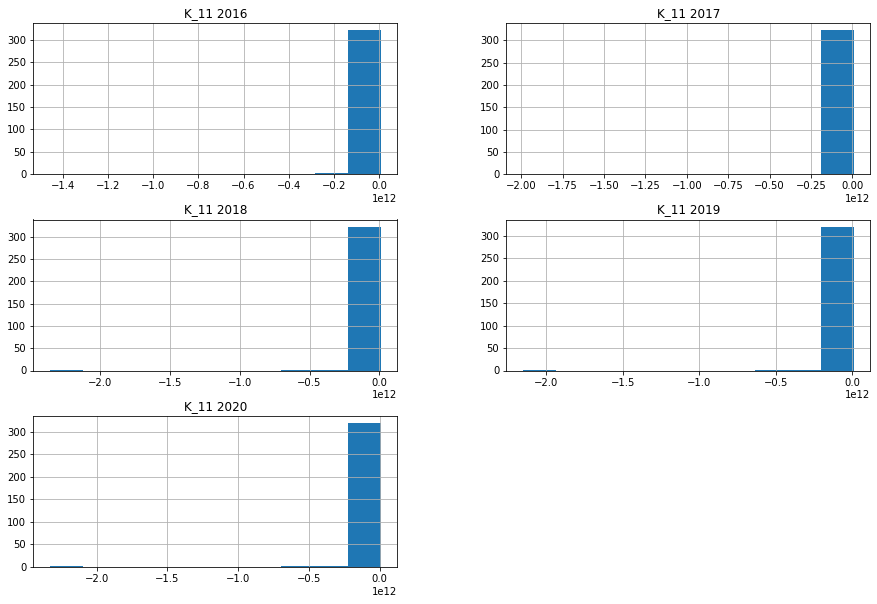

In [49]:
data[['K_11 2016', 'K_11 2017', 'K_11 2018', 'K_11 2019', 'K_11 2020']].hist(figsize=(15, 10))

In [50]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()
scaler.fit(data[['K_11 2016']])

for col in ['K_11 2016', 'K_11 2017', 'K_11 2018', 'K_11 2019', 'K_11 2020']:
    data[col] = scaler.transform(data[[col]])


D:\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (325). n_quantiles is set to n_samples.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- K_11 2017
Feature names seen at fit time, yet now missing:
- K_11 2016

  warnings.warn(message, FutureWarning)
D:\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- K_11 2018
Feature names seen at fit time, yet now missing:
- K_11 2016

  warnings.warn(message, FutureWarning)
D:\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting v

array([[<AxesSubplot:title={'center':'K_11 2016'}>,
        <AxesSubplot:title={'center':'K_11 2017'}>],
       [<AxesSubplot:title={'center':'K_11 2018'}>,
        <AxesSubplot:title={'center':'K_11 2019'}>],
       [<AxesSubplot:title={'center':'K_11 2020'}>, <AxesSubplot:>]],
      dtype=object)

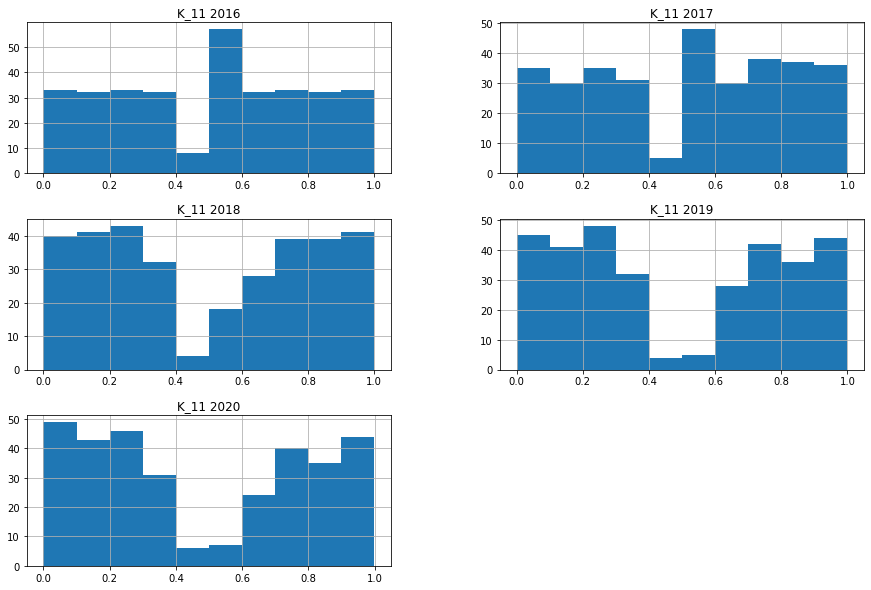

In [51]:
data[['K_11 2016', 'K_11 2017', 'K_11 2018', 'K_11 2019', 'K_11 2020']].hist(figsize=(15, 10))

Поучилось вроде получше. Но надо будет смотреть как и что на обучении. И корректировать. Возможно вообще поубирать.

In [52]:
# К_12 - доля собственного капитала в оборотных средствах (коэффициент обеспеченности собственными средствами)
data[['K_12 2016', 'K_12 2017', 'K_12 2018', 'K_12 2019', 'K_12 2020']].describe()

,K_12 2016,K_12 2017,K_12 2018,K_12 2019,K_12 2020
count,325.00,325.00,325.00,325.00,325.00
mean,-0.41,-0.31,-0.41,-0.37,-0.52
std,2.81,3.04,2.00,1.76,2.50
min,-46.33,-43.04,-29.24,-21.91,-29.84
25%,-0.20,-0.22,-0.34,-0.33,-0.34
50%,0.00,0.00,0.00,-0.01,-0.02
75%,0.10,0.12,0.12,0.13,0.15
max,2.00,26.90,2.73,2.28,0.98


In [53]:
# посмотрим на этих аномальных контрагентов
data[(data['K_12 2017'] > 5) | (data['K_12 2017'] < -5)][['2017, f1_490',
                              '2017, f1_190',
                              '2017, f1_290',
                              'K_12 2017', 'K_12 2018', 'K_18 2019']]

,"2017, f1_490","2017, f1_190","2017, f1_290",K_12 2017,K_12 2018,K_18 2019
2,"5,645,995,541.40","133,883,374,522.29","13,780,017,834.39",-9.31,-3.74,0.60
120,"-59,737,991,082.80","1,930,638,310,191.08","46,246,445,222.93",-43.04,-29.24,0.51
157,"-2,258,370,700.64","56,505,912,101.91","8,439,249,044.59",-6.96,-9.88,0.30
184,"11,170,967,515.92","181,972,245,859.87","22,086,017,834.39",-7.73,-5.79,0.61
205,"2,657,817,834.39","4,413,328,662.42","193,853,503.18",-9.06,-8.12,0.45
304,"4,267,369,426.75","2,133,788,535.03","79,301,910.83",26.90,2.73,-1.28


Заменим на 5 или -5 соответственно

In [54]:
for col in ['K_12 2016', 'K_12 2017', 'K_12 2018', 'K_12 2019', 'K_12 2020']:
    data[col] = data[col].apply(lambda x: x if x < 5 else 5)
    data[col] = data[col].apply(lambda x: x if x > -5 else -5)

In [55]:
# К_13 - коэффициент автономии (финансовой независимости)
data[['K_13 2016', 'K_13 2017', 'K_13 2018', 'K_13 2019', 'K_13 2020']].describe()

,K_13 2016,K_13 2017,K_13 2018,K_13 2019,K_13 2020
count,325.00,325.00,325.00,325.00,325.00
mean,0.21,0.20,0.22,0.24,0.24
std,0.25,0.33,0.23,0.21,0.22
min,-0.95,-3.56,-0.68,-0.59,-0.92
25%,0.01,0.03,0.06,0.08,0.08
50%,0.14,0.14,0.16,0.19,0.20
75%,0.36,0.34,0.36,0.37,0.36
max,2.00,2.01,1.41,1.05,0.99


In [56]:
# К_14 - коэффициент обеспеченности оборотными средствами
data[['K_14 2016', 'K_14 2017', 'K_14 2018', 'K_14 2019', 'K_14 2020']].describe()

,K_14 2016,K_14 2017,K_14 2018,K_14 2019,K_14 2020
count,325.00,325.00,325.00,325.00,325.00
mean,"4,953,277.46","2,784,053.74","4,627,817.30","157,883,322.47","68,465,107.45"
std,"48,831,086.20","35,483,898.69","55,960,648.45","2,790,964,893.92","1,113,286,058.77"
min,0.00,0.00,0.00,0.00,0.00
25%,2.19,2.47,3.43,3.94,4.17
50%,4.88,5.15,5.31,5.99,6.52
75%,10.18,9.96,9.72,10.17,10.51
max,"605,308,917.20","604,989,808.92","760,780,254.78","50,310,762,420.38","19,964,747,770.70"


In [57]:
data[data['K_14 2017'] > 70][['2017, f1_290',
                              '2017, Выручка, RUB',
                              'K_14 2017', 'K_14 2018', 'K_14 2019']]

,"2017, f1_290","2017, Выручка, RUB",K_14 2017,K_14 2018,K_14 2019
18,"107,911,828,025.48","6,156,610,828.03",210.33,97.55,135.36
31,"49,760,461,146.50","6,036,913,375.80",98.91,70.28,115.72
37,"67,724,857,961.78","4,734,052,866.24",171.67,71.16,0.00
40,"353,241,985,987.26","56,552,270,063.69",74.96,67.68,74.93
41,"604,989,808.92",0.00,"604,989,808.92","660,242,675.16","168,718,471.34"
205,"193,853,503.18",0.00,"193,853,503.18",248.79,329.47
274,"226,751.59",0.00,"226,751.59",5.47,6.82
279,"617,168,152.87","1,326,114.65","5,584.70","7,344.70","50,310,762,420.38"
290,"1,910,228,662.42","159,056,687.90",144.12,455.32,32.09
301,"363,057.32",0.00,"363,057.32",32.22,15.35


Опять участвует в расчете выручка и таже проблема, что и у коффициентов, у которых  в знаменателе выручка. Заменим слишком высокие значения порогом 70. 

In [58]:
for col in ['K_14 2016', 'K_14 2017', 'K_14 2018', 'K_14 2019', 'K_14 2020']:
    data[col] = data[col].apply(lambda x: x if x < 70 else 70)

In [59]:
# К_17 - рентабельность оборотного капитала
data[['K_17 2016', 'K_17 2017', 'K_17 2018', 'K_17 2019', 'K_17 2020']].describe()

,K_17 2016,K_17 2017,K_17 2018,K_17 2019,K_17 2020
count,325.00,325.00,325.00,325.00,325.00
mean,0.09,0.07,0.07,0.09,0.07
std,0.34,0.19,0.37,0.20,0.32
min,-0.66,-0.85,-5.26,-0.46,-1.90
25%,0.00,0.00,0.01,0.01,0.01
50%,0.02,0.02,0.03,0.03,0.03
75%,0.07,0.08,0.09,0.10,0.09
max,4.49,2.21,1.61,1.57,3.35


In [60]:
# К_18 - рентабельность продаж
data[['K_18 2016', 'K_18 2017', 'K_18 2018', 'K_18 2019', 'K_18 2020']].describe()

,K_18 2016,K_18 2017,K_18 2018,K_18 2019,K_18 2020
count,325.00,325.00,325.00,325.00,325.00
mean,-297.86,"-1,983.29","-52,456.61",-950.49,-401.70
std,"5,370.35","19,422.24","914,480.68","12,616.05","7,242.90"
min,"-96,815.29","-273,248.41","-16,482,165.61","-200,000.00","-130,573.25"
25%,0.00,0.00,0.01,0.01,0.01
50%,0.02,0.02,0.03,0.03,0.03
75%,0.06,0.06,0.07,0.07,0.08
max,0.68,0.63,0.66,0.66,0.69


In [61]:
data[data['K_18 2017'] < -1][['2017, Прибыль (убыток) от продажи, RUB',
                              '2017, Выручка, RUB',
                              'K_18 2017', 'K_18 2018', 'K_18 2019']]

,"2017, Прибыль (убыток) от продажи, RUB","2017, Выручка, RUB",K_18 2017,K_18 2018,K_18 2019
41,"-129,299.36",0.00,"-129,299.36","-170,700.64","-108,917.20"
304,"-83,439.49",0.00,"-83,439.49",-3.33,-1.28
317,"-273,248.41",0.00,"-273,248.41","-16,482,165.61",-7.88
319,"-158,598.73",0.00,"-158,598.73","-395,541.40","-200,000.00"


Опять в знаменателе выручка, и аномалии у кого она 0. Заменим на -1

In [62]:
for col in ['K_18 2016', 'K_18 2017', 'K_18 2018', 'K_18 2019', 'K_18 2020']:
    data[col] = data[col].apply(lambda x: x if x > -1 else -1)

In [63]:
# К_20 - эффективность внеоборотного капитала (фондоотдача)
data[['K_20 2016', 'K_20 2017', 'K_20 2018', 'K_20 2019', 'K_20 2020']].describe()

,K_20 2016,K_20 2017,K_20 2018,K_20 2019,K_20 2020
count,325.00,325.00,325.00,325.00,325.00
mean,"544,909.15","778,976.19","905,896.26","855,183.34","1,037,314.49"
std,"4,462,065.37","5,281,442.00","5,652,463.01","7,363,233.45","9,317,060.67"
min,-15.88,0.00,0.00,0.00,0.00
25%,0.04,0.05,0.11,0.16,0.16
50%,0.33,0.40,0.55,0.59,0.48
75%,1.54,1.96,2.31,2.18,1.86
max,"62,167,993.63","65,278,503.18","49,355,148.62","118,819,055.20","152,973,354.56"


In [64]:
data[data['K_20 2017'] > 30][['2017, Выручка, RUB',
                              '2017, f1_190',
                              'K_20 2017', 'K_20 2018', 'K_20 2019']]

,"2017, Выручка, RUB","2017, f1_190",K_20 2017,K_20 2018,K_20 2019
116,"78,615,286.62",0.00,"6,551,273.89","7,998,566.88","8,869,214.44"
117,"582,167,515.92","119,745.22",405.14,6.51,8.91
131,"136,915,923.57",0.00,"11,409,660.30",3.21,4.65
132,"88,817,197.45","112,101.91",66.02,168.39,"14,314,225.05"
138,"95,540,127.39","117,197.45",67.93,80.82,100.88
143,"3,643,677,070.06","4,119,745.22",73.70,56.28,102.64
152,"959,677,070.06","803,821.66",99.49,766.47,"118,819,055.20"
158,"320,009,554.14","280,254.78",95.15,110.54,160.34
166,"645,375,159.24","600,636.94",89.54,98.74,115.90
171,"483,755,414.01",0.00,"40,312,951.17","40,881,475.58","33,434,554.14"


In [65]:
# Заменим на 30
for col in ['K_20 2016', 'K_20 2017', 'K_20 2018', 'K_20 2019', 'K_20 2020']:
    data[col] = data[col].apply(lambda x: x if x < 30 else 30)

**Посмотрим корреляцию между коэффициентами**

Возьмем один год, так как во всех годах зависимость будет аналогичная.

In [66]:
data_K_corr = data[['K_1 2019', 'K_4 2019', 'K_5 2019', 'K_6 2019', 'K_9 2019', 'K_10 2019', 'K_11 2019', 'K_12 2019', 'K_13 2019',
    'K_14 2019', 'K_17 2019', 'K_18 2019', 'K_20 2019']].corr().abs()

data_K_corr

,K_1 2019,K_4 2019,K_5 2019,K_6 2019,K_9 2019,K_10 2019,K_11 2019,K_12 2019,K_13 2019,K_14 2019,K_17 2019,K_18 2019,K_20 2019
K_1 2019,1.00,0.34,0.15,0.32,0.20,0.11,0.11,0.17,0.05,0.07,0.25,0.43,0.04
K_4 2019,0.34,1.00,0.83,0.90,0.81,0.26,0.15,0.24,0.05,0.76,0.05,0.53,0.10
K_5 2019,0.15,0.83,1.00,0.67,0.64,0.23,0.28,0.47,0.06,0.68,0.12,0.34,0.15
K_6 2019,0.32,0.90,0.67,1.00,0.93,0.17,0.11,0.12,0.02,0.78,0.08,0.44,0.09
K_9 2019,0.20,0.81,0.64,0.93,1.00,0.09,0.17,0.14,0.09,0.87,0.10,0.39,0.12
K_10 2019,0.11,0.26,0.23,0.17,0.09,1.00,0.23,0.14,0.47,0.28,0.00,0.13,0.05
K_11 2019,0.11,0.15,0.28,0.11,0.17,0.23,1.00,0.60,0.39,0.10,0.15,0.08,0.32
K_12 2019,0.17,0.24,0.47,0.12,0.14,0.14,0.60,1.00,0.24,0.09,0.45,0.27,0.20
K_13 2019,0.05,0.05,0.06,0.02,0.09,0.47,0.39,0.24,1.00,0.01,0.12,0.01,0.11
K_14 2019,0.07,0.76,0.68,0.78,0.87,0.28,0.10,0.09,0.01,1.00,0.14,0.35,0.16


<AxesSubplot:>

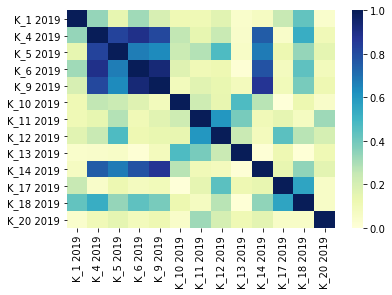

In [67]:
sns.heatmap(data_K_corr, vmin=0, vmax=1, cmap="YlGnBu")

Высокая кореляция между K_4, K_5, K_6, K_9, K_14. Особенно у K_4 со всеми (кроеме K_14). Так как он обощенный, а состоят из его частей в знаменатели.

Решать какие коэффициенты убирать необходимо во время обучения. Зарание определенно сказать нельзя.

**Посмотрим как обстоят дела у тех, кто платит всегда и у тех, кто имеет постоянную задолженность**

In [68]:
always_pay = data[(data['target_2019 01']==0) & (data['target_2020 01']==0) & (data['target_2021 01']==0)]

In [69]:
always_pay.describe()

,Unnamed: 0,Наименование ДП,"Макс. ПДЗ за 2019 год, дней","Сред. ПДЗ за 2019 год, дней","Кол-во просрочек свыше 5-ти дней за 2019 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.","Кол-во раз ПДЗ за 2019 год, шт.","Макс. ПДЗ за 2020 год, дней","Сред. ПДЗ за 2020 год, дней","Кол-во просрочек свыше 5-ти дней за 2020 год, шт.",...,K_6 2020,K_9 2020,K_10 2020,K_11 2020,K_12 2020,K_13 2020,K_14 2020,K_17 2020,K_18 2020,K_20 2020
count,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,...,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00
mean,181.36,292.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,6.66,11.77,2.35,0.59,0.02,0.34,9.32,0.11,0.02,4.41
std,104.73,170.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,25.17,32.57,4.07,0.32,0.61,0.27,15.44,0.17,0.19,9.18
min,4.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.05,-2.30,-0.00,0.00,-0.01,-1.00,0.00
25%,86.50,142.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.84,2.16,0.83,0.27,-0.11,0.11,3.03,0.02,0.01,0.19
50%,187.00,287.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.35,3.16,1.39,0.71,0.06,0.29,5.45,0.05,0.03,0.76
75%,283.75,461.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.30,5.88,2.23,0.88,0.44,0.53,7.54,0.14,0.07,2.28
max,324.00,528.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,150.00,150.00,25.00,1.00,0.98,0.99,70.00,0.93,0.24,30.00


In [70]:
never_pay = data[(data['target_2019 01']==1) & (data['target_2020 01']==1) & (data['target_2021 01']==1)]

In [71]:
never_pay.describe()

,Unnamed: 0,Наименование ДП,"Макс. ПДЗ за 2019 год, дней","Сред. ПДЗ за 2019 год, дней","Кол-во просрочек свыше 5-ти дней за 2019 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.","Кол-во раз ПДЗ за 2019 год, шт.","Макс. ПДЗ за 2020 год, дней","Сред. ПДЗ за 2020 год, дней","Кол-во просрочек свыше 5-ти дней за 2020 год, шт.",...,K_6 2020,K_9 2020,K_10 2020,K_11 2020,K_12 2020,K_13 2020,K_14 2020,K_17 2020,K_18 2020,K_20 2020
count,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,...,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00
mean,151.33,244.27,174.75,37.96,22.77,"16,520,693.06",47.06,118.79,35.21,36.10,...,10.85,20.34,1.11,0.39,-0.69,0.11,14.45,-0.05,0.05,2.63
std,89.39,144.66,290.60,90.34,34.29,"26,394,977.82",54.43,149.58,56.08,74.48,...,27.10,34.36,0.94,0.34,1.38,0.24,17.47,0.37,0.15,7.43
min,1.00,2.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,...,0.00,0.00,0.00,0.00,-5.00,-0.92,0.00,-1.90,-0.36,0.00
25%,77.50,132.00,10.50,3.91,2.00,"526,076.88",6.00,17.75,5.24,3.75,...,1.51,4.80,0.73,0.07,-0.63,0.03,5.26,-0.01,0.00,0.07
50%,139.50,218.50,30.00,8.61,10.00,"4,800,628.82",32.00,35.50,10.38,12.50,...,3.11,9.10,0.86,0.27,-0.07,0.12,8.89,0.01,0.02,0.28
75%,228.50,372.25,99.25,21.82,25.75,"20,149,959.64",72.00,214.50,31.41,32.25,...,7.43,21.23,1.31,0.69,0.02,0.22,13.65,0.05,0.05,0.80
max,299.00,488.00,884.00,608.00,179.00,"126,852,407.89",226.00,489.00,245.22,445.00,...,150.00,150.00,6.20,1.00,0.69,0.69,70.00,0.54,0.62,30.00


На глаз  закономерности выявить трудно. ИДЕЯ!!! Предоставим это машинному обучению. Объединим их вместе и посмотрим на графики и пообучаем на такой выборке модели - показать ей крайности, чтоб не путать сейчас платит, потом не платит или наоброт.

In [72]:
df_0_1 = pd.concat([always_pay, never_pay])

In [73]:
df_0_1

,Unnamed: 0,Наименование ДП,"Макс. ПДЗ за 2019 год, дней","Сред. ПДЗ за 2019 год, дней","Кол-во просрочек свыше 5-ти дней за 2019 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.","Кол-во раз ПДЗ за 2019 год, шт.","Макс. ПДЗ за 2020 год, дней","Сред. ПДЗ за 2020 год, дней","Кол-во просрочек свыше 5-ти дней за 2020 год, шт.",...,K_6 2020,K_9 2020,K_10 2020,K_11 2020,K_12 2020,K_13 2020,K_14 2020,K_17 2020,K_18 2020,K_20 2020
4,4,6,0,0.00,0,0.00,0,0,0.00,0,...,1.45,3.13,2.57,0.05,-0.53,0.12,8.02,-0.01,0.12,0.17
11,11,17,0,0.00,0,0.00,0,0,0.00,0,...,4.03,8.14,1.20,0.84,0.06,0.21,9.78,0.01,0.02,0.53
12,12,19,0,0.00,0,0.00,0,0,0.00,0,...,2.19,4.47,4.53,0.99,0.73,0.77,20.28,0.02,0.02,0.26
17,17,26,0,0.00,0,0.00,0,0,0.00,0,...,0.85,2.81,0.72,0.68,0.06,0.24,2.04,0.03,0.01,2.14
41,41,69,0,0.00,0,0.00,0,0,0.00,0,...,150.00,150.00,25.00,0.89,0.98,0.98,70.00,0.01,-1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,281,458,47,32.11,9,"1,198,168.13",9,46,20.00,9,...,6.30,15.20,0.69,0.07,-0.19,0.12,10.50,0.00,0.01,0.27
290,290,470,565,123.40,3,"6,588,764.33",5,342,50.68,32,...,7.59,27.40,0.31,0.02,-3.23,0.22,8.46,0.12,0.11,0.03
293,293,477,328,62.33,4,"1,115,785.36",6,211,211.00,1,...,72.75,145.46,0.85,0.26,-0.40,0.05,70.00,-0.08,0.18,0.02
298,298,485,1,1.00,0,0.00,1,1,1.00,0,...,5.83,12.76,1.16,0.61,0.00,0.00,14.77,0.00,0.05,20.49


По графикам видно, что тут разделение по признакам более видны, чем в общем data, но она занимает много времени. Делать только по необходимости для поиска идей, раскоментировав ниже код.


In [74]:

# col_list = list(df_0_1.columns[12:])
# for i in range(len(col_list)-1):
#         print(col_list[i], 'и', col_list[i+1])
#         plt.scatter(x=df_0_1[col_list[i]], y=df_0_1[col_list[i+1]], c=df_0_1['target_2019 01'])
#         plt.show()


Для предсказания просрочки задолженности по клиентам, с которым давно работает предприятие можно добавить в отборочные столбцы такие показатели, как:

- 'Макс. ПДЗ за 2019 год, дней',
- 'Сред. ПДЗ за 2019 год, дней',
- 'Кол-во просрочек свыше 5-ти дней за 2019 год, шт.',
- 'Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.',
- 'Кол-во раз ПДЗ за 2019 год, шт.',
- 'Макс. ПДЗ за 2020 год, дней',
- 'Сред. ПДЗ за 2020 год, дней',
- 'Кол-во просрочек свыше 5-ти дней за 2020 год, шт.',
- 'Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.',
- 'Кол-во раз ПДЗ за 2020 год, шт.'

Посмотрим коореляционную зависимость с целевыми переменными

In [75]:
data[['Макс. ПДЗ за 2019 год, дней',
 'Сред. ПДЗ за 2019 год, дней',
 'Кол-во просрочек свыше 5-ти дней за 2019 год, шт.',
 'Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.',
 'Кол-во раз ПДЗ за 2019 год, шт.',
  'target_2020 01', 'target_2020 012', 'target_2020 01234']].corr()

,"Макс. ПДЗ за 2019 год, дней","Сред. ПДЗ за 2019 год, дней","Кол-во просрочек свыше 5-ти дней за 2019 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.","Кол-во раз ПДЗ за 2019 год, шт.",target_2020 01,target_2020 012,target_2020 01234
"Макс. ПДЗ за 2019 год, дней",1.00,0.58,0.36,0.39,0.23,0.06,0.21,0.35
"Сред. ПДЗ за 2019 год, дней",0.58,1.00,0.16,0.18,0.08,0.05,0.18,0.27
"Кол-во просрочек свыше 5-ти дней за 2019 год, шт.",0.36,0.16,1.00,0.74,0.81,0.11,0.25,0.26
"Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.",0.39,0.18,0.74,1.00,0.59,0.00,0.14,0.16
"Кол-во раз ПДЗ за 2019 год, шт.",0.23,0.08,0.81,0.59,1.00,0.19,0.28,0.24
target_2020 01,0.06,0.05,0.11,0.00,0.19,1.00,0.82,0.68
target_2020 012,0.21,0.18,0.25,0.14,0.28,0.82,1.00,0.93
target_2020 01234,0.35,0.27,0.26,0.16,0.24,0.68,0.93,1.00


In [76]:
data[['Макс. ПДЗ за 2020 год, дней',
 'Сред. ПДЗ за 2020 год, дней',
 'Кол-во просрочек свыше 5-ти дней за 2020 год, шт.',
 'Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.',
 'Кол-во раз ПДЗ за 2020 год, шт.', 
  'target_2020 01', 'target_2020 012', 'target_2020 01234']].corr()

,"Макс. ПДЗ за 2020 год, дней","Сред. ПДЗ за 2020 год, дней","Кол-во просрочек свыше 5-ти дней за 2020 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.","Кол-во раз ПДЗ за 2020 год, шт.",target_2020 01,target_2020 012,target_2020 01234
"Макс. ПДЗ за 2020 год, дней",1.00,0.78,0.29,0.30,0.17,0.23,0.57,0.81
"Сред. ПДЗ за 2020 год, дней",0.78,1.00,0.14,0.20,0.05,0.20,0.46,0.67
"Кол-во просрочек свыше 5-ти дней за 2020 год, шт.",0.29,0.14,1.00,0.66,0.87,0.18,0.35,0.34
"Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.",0.30,0.20,0.66,1.00,0.63,0.18,0.36,0.36
"Кол-во раз ПДЗ за 2020 год, шт.",0.17,0.05,0.87,0.63,1.00,0.28,0.35,0.29
target_2020 01,0.23,0.20,0.18,0.18,0.28,1.00,0.82,0.68
target_2020 012,0.57,0.46,0.35,0.36,0.35,0.82,1.00,0.93
target_2020 01234,0.81,0.67,0.34,0.36,0.29,0.68,0.93,1.00


В общем с корреляцией очень хорошо. Далее расмотрим распределение.

In [77]:
col_for_pastreded_client_2020 = ['Макс. ПДЗ за 2019 год, дней',
 'Сред. ПДЗ за 2019 год, дней',
 'Кол-во просрочек свыше 5-ти дней за 2019 год, шт.',
 'Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.',
 'Кол-во раз ПДЗ за 2019 год, шт.']

col_for_pastreded_client_2021 = ['Макс. ПДЗ за 2020 год, дней',
 'Сред. ПДЗ за 2020 год, дней',
 'Кол-во просрочек свыше 5-ти дней за 2020 год, шт.',
 'Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.',
 'Кол-во раз ПДЗ за 2020 год, шт.']

array([[<AxesSubplot:title={'center':'Кол-во просрочек свыше 5-ти дней за 2019 год, шт.'}>,
        <AxesSubplot:title={'center':'Кол-во раз ПДЗ за 2019 год, шт.'}>],
       [<AxesSubplot:title={'center':'Макс. ПДЗ за 2019 год, дней'}>,
        <AxesSubplot:title={'center':'Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.'}>],
       [<AxesSubplot:title={'center':'Сред. ПДЗ за 2019 год, дней'}>,
        <AxesSubplot:>]], dtype=object)

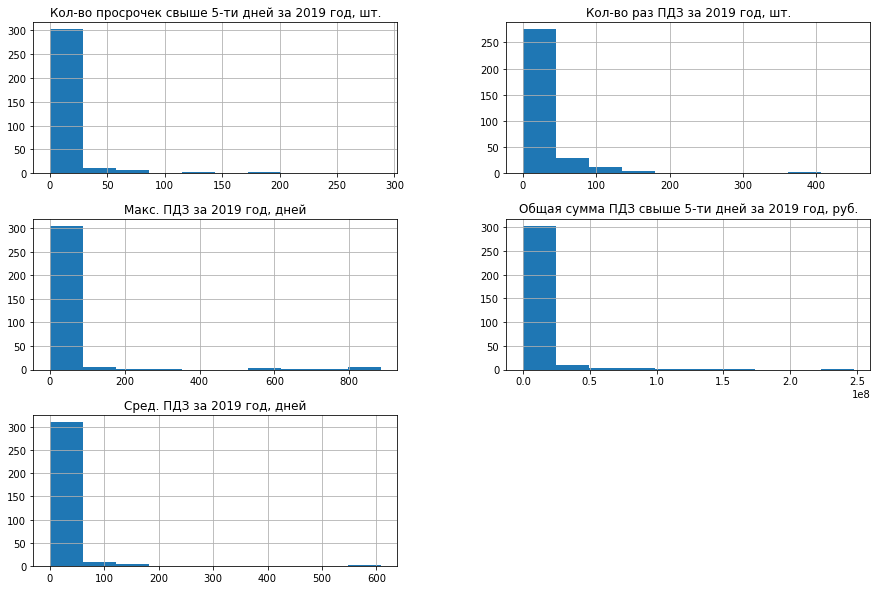

In [78]:
data[['Макс. ПДЗ за 2019 год, дней',
 'Сред. ПДЗ за 2019 год, дней',
 'Кол-во просрочек свыше 5-ти дней за 2019 год, шт.',
 'Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.',
 'Кол-во раз ПДЗ за 2019 год, шт.']].hist(figsize=(15, 10))

array([[<AxesSubplot:title={'center':'Кол-во просрочек свыше 5-ти дней за 2020 год, шт.'}>,
        <AxesSubplot:title={'center':'Кол-во раз ПДЗ за 2020 год, шт.'}>],
       [<AxesSubplot:title={'center':'Макс. ПДЗ за 2020 год, дней'}>,
        <AxesSubplot:title={'center':'Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.'}>],
       [<AxesSubplot:title={'center':'Сред. ПДЗ за 2020 год, дней'}>,
        <AxesSubplot:>]], dtype=object)

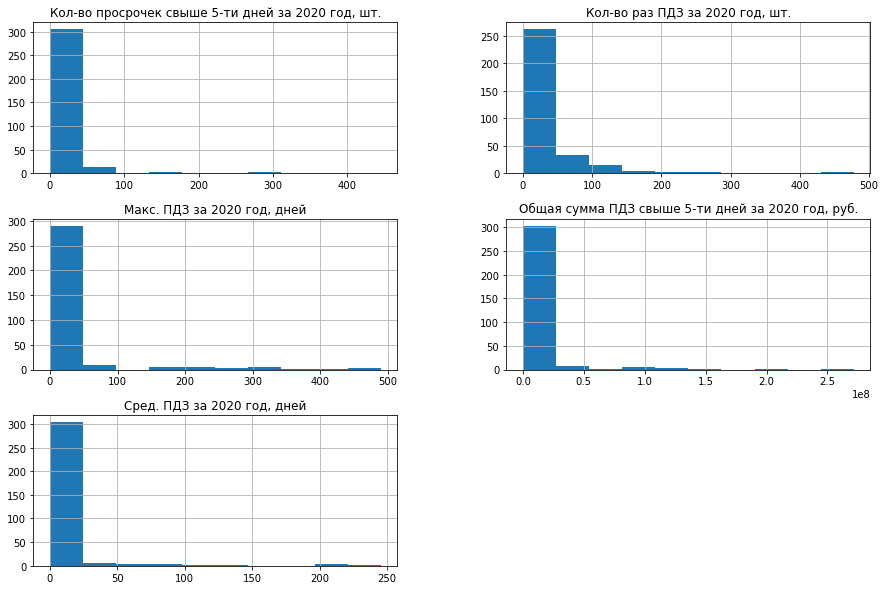

In [79]:
data[['Макс. ПДЗ за 2020 год, дней',
 'Сред. ПДЗ за 2020 год, дней',
 'Кол-во просрочек свыше 5-ти дней за 2020 год, шт.',
 'Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.',
 'Кол-во раз ПДЗ за 2020 год, шт.']].hist(figsize=(15, 10))

У всех смещенные гистограммы с длинным хвостом справа. Попробуем логарифмировать.

In [80]:
for col in col_for_pastreded_client_2020:
    data[col] = np.log(data[col]+1)
for col in col_for_pastreded_client_2021:
    data[col] = np.log(data[col]+1)

array([[<AxesSubplot:title={'center':'Кол-во просрочек свыше 5-ти дней за 2019 год, шт.'}>,
        <AxesSubplot:title={'center':'Кол-во раз ПДЗ за 2019 год, шт.'}>],
       [<AxesSubplot:title={'center':'Макс. ПДЗ за 2019 год, дней'}>,
        <AxesSubplot:title={'center':'Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.'}>],
       [<AxesSubplot:title={'center':'Сред. ПДЗ за 2019 год, дней'}>,
        <AxesSubplot:>]], dtype=object)

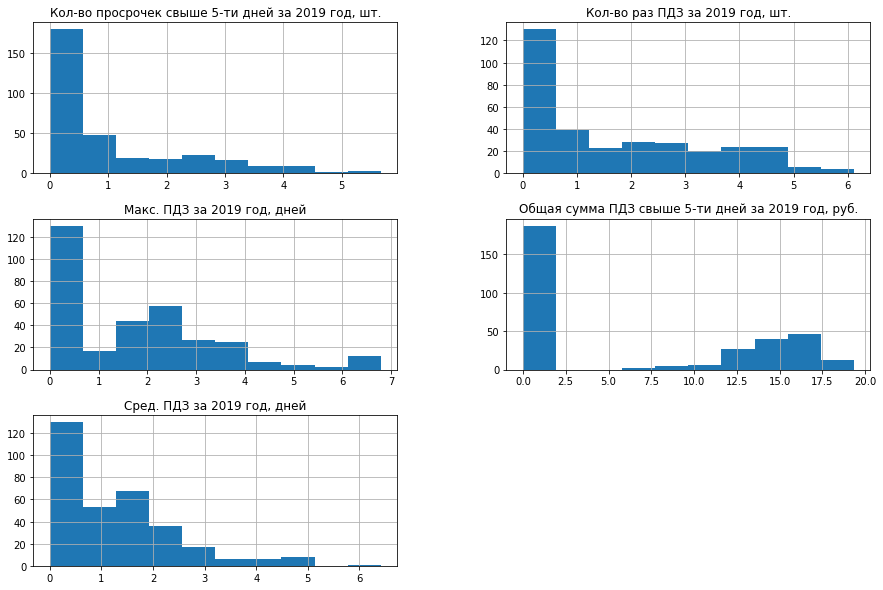

In [81]:
data[['Макс. ПДЗ за 2019 год, дней',
 'Сред. ПДЗ за 2019 год, дней',
 'Кол-во просрочек свыше 5-ти дней за 2019 год, шт.',
 'Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.',
 'Кол-во раз ПДЗ за 2019 год, шт.']].hist(figsize=(15, 10))

array([[<AxesSubplot:title={'center':'Кол-во просрочек свыше 5-ти дней за 2020 год, шт.'}>,
        <AxesSubplot:title={'center':'Кол-во раз ПДЗ за 2020 год, шт.'}>],
       [<AxesSubplot:title={'center':'Макс. ПДЗ за 2020 год, дней'}>,
        <AxesSubplot:title={'center':'Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.'}>],
       [<AxesSubplot:title={'center':'Сред. ПДЗ за 2020 год, дней'}>,
        <AxesSubplot:>]], dtype=object)

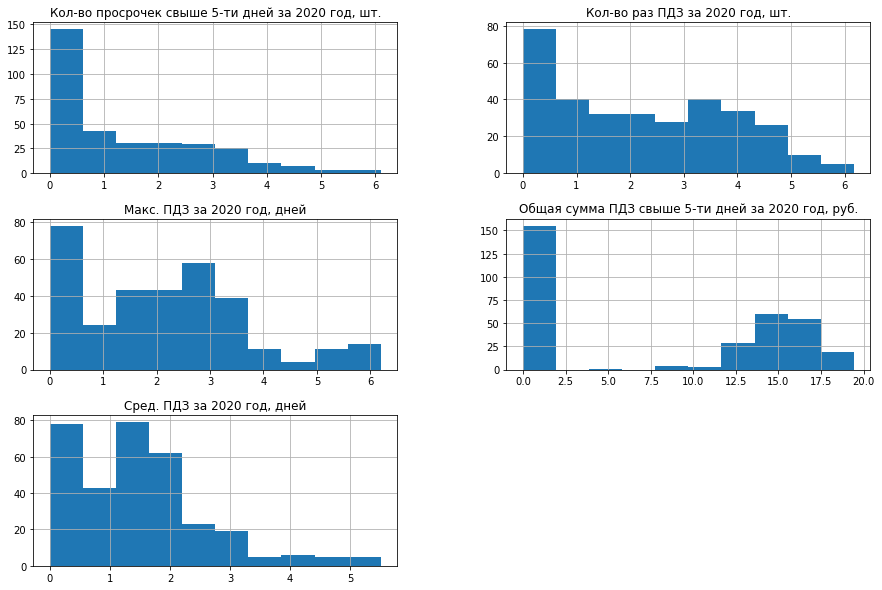

In [82]:
data[['Макс. ПДЗ за 2020 год, дней',
 'Сред. ПДЗ за 2020 год, дней',
 'Кол-во просрочек свыше 5-ти дней за 2020 год, шт.',
 'Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.',
 'Кол-во раз ПДЗ за 2020 год, шт.']].hist(figsize=(15, 10))

Стало гораздо лучше. Добавим эти колонки при формировании датасетов.

### Формирование итоговых датасетов, которые пойдут уже для обучения.

Сформируем 3 датасета для обучения и несколько наборов целевых переменных.

Так как если модель будет использоваться на предприятии, то данные о контрагентах чаще всего получить можно прошлогодние, а не текущие. И наша модель должна рассчитывать возможность просрочки основываясь на показатели прошлых периодов.

Для target_2019 возьмем года 2016-2018 - Проверять будем на targete_2020 и годах 2017-2019

Для target_2020 возьмем года 2017-2019 - Проверять будем на targete_2021 и годах 2018-2020


In [83]:
col_general = ['Факт 32', 'Факт 31', 'Факт 23', 'Факт 24', 'Факт 27', 'Факт 33', 'Факт 28',
               'Факт 29', 'Факт 30', 'Факт 40', 'Факт 41', 'Факт 42', 'Факт 46', 'Факт 48',
               'Факт 49', 'Факт 50', 'Факт 51', 'Факт 54', 'Факт 55', 'Факт 57', 'Факт 58',
               'Факт 59', 'Факт 60', 'Факт 37', 'Факт 39', 'Факт 1', 'Факт 2', 'Факт 3', 
               'Факт 7', 'Факт 12', 'Факт 14', 'ОПК 1', 'ОПК 2']

Составление списков названий столбцов для наших датасетов

In [84]:
col_list = list(data.columns)[15:]

col_for_df_2019 = []
for col in col_list:
    if '2016,' in col or '2017,' in col or '2018,' in col:
        col_for_df_2019.append(col) 
    if ('2016' in col or '2017' in col or '2018' in col) and ('K_' in col):
        col_for_df_2019.append(col) 
col_for_df_2019  = col_for_df_2019 + col_general # прибавляем колонки с фактами

#---------------
col_for_df_2020 = []
for col in col_list:
    if '2017,' in col or '2018,' in col or '2019,' in col :
        col_for_df_2020.append(col)
    if ('2017' in col or '2018' in col or '2019' in col) and ('K_' in col):
        col_for_df_2020.append(col)
# прибавляем колонки с фактами и признаками для постоянных клинтов        
col_for_df_2020  = col_for_df_2020 + col_general+ col_for_pastreded_client_2020         
        
#---------------        
col_for_df_2021 = []
for col in col_list:
    if '2018,' in col or '2019,' in col or '2020,' in col :
        col_for_df_2021.append(col)   
    if ('2018' in col or '2019' in col or '2020' in col) and ('K_' in col):
        col_for_df_2021.append(col) 
        
col_for_df_2021  = col_for_df_2021 + col_general + col_for_pastreded_client_2021        

Собираем **"полные"** датасеты

In [85]:
df_2019_full = data[col_for_df_2019]
df_2020_full = data[col_for_df_2020]
df_2021_full = data[col_for_df_2021]

Собираем **"всегда платит или всегда должен"** датасеты

In [86]:
df_2019_part = df_0_1[col_for_df_2019]
df_2020_part = df_0_1[col_for_df_2020]
df_2021_part = df_0_1[col_for_df_2021]

Собираем **"target"**  для **полных** датасетов

In [87]:
target_2019_01_full = data['target_2019 01']
target_2020_01_full = data['target_2020 01']
target_2021_01_full = data['target_2021 01']

target_2019_012_full = data['target_2019 012']
target_2020_012_full = data['target_2020 012']
target_2021_012_full = data['target_2021 012']

target_2019_01234_full = data['target_2019 01234']
target_2020_01234_full = data['target_2020 01234']
target_2021_01234_full = data['target_2021 01234']

Собираем **"target"**  для  **"всегда платит или всегда должен"**  датасетов

In [88]:
target_2019_01_part = df_0_1['target_2019 01']
target_2020_01_part = df_0_1['target_2020 01']
target_2021_01_part = df_0_1['target_2021 01']

target_2019_012_part = df_0_1['target_2019 012']
target_2020_012_part = df_0_1['target_2020 012']
target_2021_012_part = df_0_1['target_2021 012']

target_2019_01234_part = df_0_1['target_2019 01234']
target_2020_01234_part = df_0_1['target_2020 01234']
target_2021_01234_part = df_0_1['target_2021 01234']

Переименуем колонки в датасетах, чтоб названия совпадали

In [89]:
df_2019_full = df_2019_full.rename(columns=lambda s: s.replace('2016', '1').replace('2017', '2').replace('2018', '3'))
df_2020_full = df_2020_full.rename(columns=lambda s: s.replace('2017', '1').replace('2018', '2').replace('2019', '3'))
df_2021_full = df_2021_full.rename(columns=lambda s: s.replace('2018', '1').replace('2019', '2').replace('2020', '3'))

df_2019_part = df_2019_part.rename(columns=lambda s: s.replace('2016', '1').replace('2017', '2').replace('2018', '3'))
df_2020_part = df_2020_part.rename(columns=lambda s: s.replace('2017', '1').replace('2018', '2').replace('2019', '3'))
df_2021_part = df_2021_part.rename(columns=lambda s: s.replace('2018', '1').replace('2019', '2').replace('2020', '3'))


**Добавим расчет динамики и удалим колонки с данными финансового учета. Оставим только расчетные признаки и факты**

In [90]:
col_list = ['Нематериальные активы, RUB', 'Основные средства , RUB', 'Внеоборотные активы, RUB', 
            'Дебиторская задолженность, RUB', 'Оборотные активы, RUB', 'Уставный капитал , RUB',
            'Капитал и резервы, RUB', 'Заёмные средства (долгосрочные), RUB', 'Долгосрочные обязательства, RUB',
            'Заёмные средства (краткосрочные), RUB', 'Кредиторская задолженность, RUB', 
            'Краткосрочные обязательства, RUB', 'Выручка, RUB', 'Себестоимость продаж, RUB', 
            'Прибыль (убыток) до налогообложения , RUB', 'Прибыль (убыток) от продажи, RUB',
            'f1_590', 'f1_690', 'f1_290', 'f1_490', 'f1_190']
col_list_K = ['K_1', 'K_4', 'K_5', 'K_6', 'K_9', 'K_10', 'K_11', 'K_12', 'K_13', 'K_14', 'K_17', 'K_18', 'K_20']

def dynamics_calculation(data, col_list, col_list_K):
    for col in col_list:
        data['Темп роста 1 ' + col] = data['2, ' + col] / (data['1, ' + col]+1)  
        data['Темп роста 2 ' + col] = data['3, ' + col] / (data['2, ' + col]+1)
        
        data['Темп прироста 1 ' + col] = (data['2, ' + col] - data['1, ' + col]) / (data['1, ' + col]+1)
        data['Темп прироста 2 ' + col] = (data['3, ' + col] - data['2, ' + col]) / (data['2, ' + col]+1)
        
        data['Ускорение ' + col] = data['Темп прироста 2 ' + col] / (data['Темп прироста 1 ' + col]+1)
        
    for col in col_list_K:
        data['Темп роста 1 ' + col] = data[col + ' 2'] / (data[col + ' 1']+1)  
        data['Темп роста 2 ' + col] = data[col + ' 3'] / (data[col + ' 2']+1)
        
        data['Темп прироста 1 ' + col] = (data[col + ' 2'] - data[col + ' 1']) / (data[col + ' 1']+1)
        data['Темп прироста 2 ' + col] = (data[col + ' 3'] - data[col + ' 2']) / (data[col + ' 2']+1)
        
        data['Ускорение ' + col] = data['Темп прироста 2 ' + col] / (data['Темп прироста 1 ' + col]+1)   
        
    return data   

In [91]:
df_2019_full = dynamics_calculation(df_2019_full, col_list, col_list_K)
df_2020_full = dynamics_calculation(df_2020_full, col_list, col_list_K)
df_2021_full = dynamics_calculation(df_2021_full, col_list, col_list_K)

df_2019_part = dynamics_calculation(df_2019_part, col_list, col_list_K)
df_2020_part = dynamics_calculation(df_2020_part, col_list, col_list_K)
df_2021_part = dynamics_calculation(df_2021_part, col_list, col_list_K)

Удаляем лишние колонки

In [92]:
col_list_drop = ['1, Нематериальные активы, RUB', '2, Нематериальные активы, RUB', '3, Нематериальные активы, RUB',
 '1, Основные средства , RUB', '2, Основные средства , RUB', '3, Основные средства , RUB', '1, Внеоборотные активы, RUB',
 '2, Внеоборотные активы, RUB', '3, Внеоборотные активы, RUB', '1, Дебиторская задолженность, RUB', '2, Дебиторская задолженность, RUB',
 '3, Дебиторская задолженность, RUB', '1, Оборотные активы, RUB', '2, Оборотные активы, RUB', '3, Оборотные активы, RUB',
 '1, Уставный капитал , RUB', '2, Уставный капитал , RUB', '3, Уставный капитал , RUB', '1, Капитал и резервы, RUB',
 '2, Капитал и резервы, RUB', '3, Капитал и резервы, RUB', '1, Заёмные средства (долгосрочные), RUB',
 '2, Заёмные средства (долгосрочные), RUB', '3, Заёмные средства (долгосрочные), RUB', '1, Долгосрочные обязательства, RUB',
 '2, Долгосрочные обязательства, RUB', '3, Долгосрочные обязательства, RUB', '1, Заёмные средства (краткосрочные), RUB',
 '2, Заёмные средства (краткосрочные), RUB', '3, Заёмные средства (краткосрочные), RUB', '1, Кредиторская задолженность, RUB',
 '2, Кредиторская задолженность, RUB', '3, Кредиторская задолженность, RUB', '1, Краткосрочные обязательства, RUB',
 '2, Краткосрочные обязательства, RUB', '3, Краткосрочные обязательства, RUB', '1, Выручка, RUB', '2, Выручка, RUB',
 '3, Выручка, RUB', '1, Себестоимость продаж, RUB', '2, Себестоимость продаж, RUB', '3, Себестоимость продаж, RUB',
 '1, Прибыль (убыток) до налогообложения , RUB', '2, Прибыль (убыток) до налогообложения , RUB', '3, Прибыль (убыток) до налогообложения , RUB',
 '1, Прибыль (убыток) от продажи, RUB', '2, Прибыль (убыток) от продажи, RUB', '3, Прибыль (убыток) от продажи, RUB',
 '1, f1_590', '1, f1_690', '1, f1_290', '1, f1_490', '1, f1_190', '2, f1_590', '2, f1_690', '2, f1_290', '2, f1_490',
 '2, f1_190', '3, f1_590', '3, f1_690', '3, f1_290', '3, f1_490', '3, f1_190']

In [93]:
df_2019_full = df_2019_full.drop(col_list_drop, axis=1)
df_2020_full = df_2020_full.drop(col_list_drop, axis=1)
df_2021_full = df_2021_full.drop(col_list_drop, axis=1)

df_2019_part = df_2019_part.drop(col_list_drop, axis=1)
df_2020_part = df_2020_part.drop(col_list_drop, axis=1)
df_2021_part = df_2021_part.drop(col_list_drop, axis=1)

Есть аномально большие значения. Сделаем тоже самое, что и с коэффициентами. Обрежем по порогу.

In [94]:
pd.set_option('display.max_columns', None)
df_2019_full.describe()

,K_1 1,K_4 1,K_5 1,K_6 1,K_9 1,K_10 1,K_11 1,K_12 1,K_13 1,K_14 1,K_17 1,K_18 1,K_20 1,K_1 2,K_4 2,K_5 2,K_6 2,K_9 2,K_10 2,K_11 2,K_12 2,K_13 2,K_14 2,K_17 2,K_18 2,K_20 2,K_1 3,K_4 3,K_5 3,K_6 3,K_9 3,K_10 3,K_11 3,K_12 3,K_13 3,K_14 3,K_17 3,K_18 3,K_20 3,Факт 32,Факт 31,Факт 23,Факт 24,Факт 27,Факт 33,Факт 28,Факт 29,Факт 30,Факт 40,Факт 41,Факт 42,Факт 46,Факт 48,Факт 49,Факт 50,Факт 51,Факт 54,Факт 55,Факт 57,Факт 58,Факт 59,Факт 60,Факт 37,Факт 39,Факт 1,Факт 2,Факт 3,Факт 7,Факт 12,Факт 14,ОПК 1,ОПК 2,"Темп роста 1 Нематериальные активы, RUB","Темп роста 2 Нематериальные активы, RUB","Темп прироста 1 Нематериальные активы, RUB","Темп прироста 2 Нематериальные активы, RUB","Ускорение Нематериальные активы, RUB","Темп роста 1 Основные средства , RUB","Темп роста 2 Основные средства , RUB","Темп прироста 1 Основные средства , RUB","Темп прироста 2 Основные средства , RUB","Ускорение Основные средства , RUB","Темп роста 1 Внеоборотные активы, RUB","Темп роста 2 Внеоборотные активы, RUB","Темп прироста 1 Внеоборотные активы, RUB","Темп прироста 2 Внеоборотные активы, RUB","Ускорение Внеоборотные активы, RUB","Темп роста 1 Дебиторская задолженность, RUB","Темп роста 2 Дебиторская задолженность, RUB","Темп прироста 1 Дебиторская задолженность, RUB","Темп прироста 2 Дебиторская задолженность, RUB","Ускорение Дебиторская задолженность, RUB","Темп роста 1 Оборотные активы, RUB","Темп роста 2 Оборотные активы, RUB","Темп прироста 1 Оборотные активы, RUB","Темп прироста 2 Оборотные активы, RUB","Ускорение Оборотные активы, RUB","Темп роста 1 Уставный капитал , RUB","Темп роста 2 Уставный капитал , RUB","Темп прироста 1 Уставный капитал , RUB","Темп прироста 2 Уставный капитал , RUB","Ускорение Уставный капитал , RUB","Темп роста 1 Капитал и резервы, RUB","Темп роста 2 Капитал и резервы, RUB","Темп прироста 1 Капитал и резервы, RUB","Темп прироста 2 Капитал и резервы, RUB","Ускорение Капитал и резервы, RUB","Темп роста 1 Заёмные средства (долгосрочные), RUB","Темп роста 2 Заёмные средства (долгосрочные), RUB","Темп прироста 1 Заёмные средства (долгосрочные), RUB","Темп прироста 2 Заёмные средства (долгосрочные), RUB","Ускорение Заёмные средства (долгосрочные), RUB","Темп роста 1 Долгосрочные обязательства, RUB","Темп роста 2 Долгосрочные обязательства, RUB","Темп прироста 1 Долгосрочные обязательства, RUB","Темп прироста 2 Долгосрочные обязательства, RUB","Ускорение Долгосрочные обязательства, RUB","Темп роста 1 Заёмные средства (краткосрочные), RUB","Темп роста 2 Заёмные средства (краткосрочные), RUB","Темп прироста 1 Заёмные средства (краткосрочные), RUB","Темп прироста 2 Заёмные средства (краткосрочные), RUB","Ускорение Заёмные средства (краткосрочные), RUB","Темп роста 1 Кредиторская задолженность, RUB","Темп роста 2 Кредиторская задолженность, RUB","Темп прироста 1 Кредиторская задолженность, RUB","Темп прироста 2 Кредиторская задолженность, RUB","Ускорение Кредиторская задолженность, RUB","Темп роста 1 Краткосрочные обязательства, RUB","Темп роста 2 Краткосрочные обязательства, RUB","Темп прироста 1 Краткосрочные обязательства, RUB","Темп прироста 2 Краткосрочные обязательства, RUB","Ускорение Краткосрочные обязательства, RUB","Темп роста 1 Выручка, RUB","Темп роста 2 Выручка, RUB","Темп прироста 1 Выручка, RUB","Темп прироста 2 Выручка, RUB","Ускорение Выручка, RUB","Темп роста 1 Себестоимость продаж, RUB","Темп роста 2 Себестоимость продаж, RUB","Темп прироста 1 Себестоимость продаж, RUB","Темп прироста 2 Себестоимость продаж, RUB","Ускорение Себестоимость продаж, RUB","Темп роста 1 Прибыль (убыток) до налогообложения , RUB","Темп роста 2 Прибыль (убыток) до налогообложения , RUB","Темп прироста 1 Прибыль (убыток) до налогообложения , RUB","Темп прироста 2 Прибыль (убыток) до налогообложения , RUB","Ускорение Прибыль (убыток) до налогообложения , RUB","Темп роста 1 Прибыль (убыток) от продажи, RUB","Темп роста 2 Прибыль (убыток) от продажи, RUB","Темп прироста 1 Прибыль (убыток) от продажи, RUB","Темп прироста 2 Прибыль (уб

Пересмотрев кучу вариантов, пришла к выводу, так как 25%,50%, 75% по динамики показатели около 0, попробовать аномальные значения заполнить константой. Это было вызвано резким изменением этого показателя, поэтому думаю не имеет большого значения у единичных объектов показатель 20 или 20000000. Модель ML увидит изменение, но не запутается, от очень большого значения.

In [95]:
for col in list(df_2019_full.columns)[72:]:
    df_2019_full[col] = df_2019_full[col].apply(lambda x: x if x < 20 else 20)
    df_2020_full[col] = df_2020_full[col].apply(lambda x: x if x < 20 else 20)
    df_2021_full[col] = df_2021_full[col].apply(lambda x: x if x < 20 else 20)
    df_2019_part[col] = df_2019_part[col].apply(lambda x: x if x < 20 else 20)
    df_2020_part[col] = df_2020_part[col].apply(lambda x: x if x < 20 else 20)
    df_2021_part[col] = df_2021_part[col].apply(lambda x: x if x < 20 else 20)
    
    df_2019_full[col] = df_2019_full[col].apply(lambda x: x if x > -20 else -20)
    df_2020_full[col] = df_2020_full[col].apply(lambda x: x if x > -20 else -20)
    df_2021_full[col] = df_2021_full[col].apply(lambda x: x if x > -20 else -20)
    df_2019_part[col] = df_2019_part[col].apply(lambda x: x if x > -20 else -20)
    df_2020_part[col] = df_2020_part[col].apply(lambda x: x if x > -20 else -20)
    df_2021_part[col] = df_2021_part[col].apply(lambda x: x if x > -20 else -20)
    
    

In [96]:
df_2019_full.describe()

,K_1 1,K_4 1,K_5 1,K_6 1,K_9 1,K_10 1,K_11 1,K_12 1,K_13 1,K_14 1,K_17 1,K_18 1,K_20 1,K_1 2,K_4 2,K_5 2,K_6 2,K_9 2,K_10 2,K_11 2,K_12 2,K_13 2,K_14 2,K_17 2,K_18 2,K_20 2,K_1 3,K_4 3,K_5 3,K_6 3,K_9 3,K_10 3,K_11 3,K_12 3,K_13 3,K_14 3,K_17 3,K_18 3,K_20 3,Факт 32,Факт 31,Факт 23,Факт 24,Факт 27,Факт 33,Факт 28,Факт 29,Факт 30,Факт 40,Факт 41,Факт 42,Факт 46,Факт 48,Факт 49,Факт 50,Факт 51,Факт 54,Факт 55,Факт 57,Факт 58,Факт 59,Факт 60,Факт 37,Факт 39,Факт 1,Факт 2,Факт 3,Факт 7,Факт 12,Факт 14,ОПК 1,ОПК 2,"Темп роста 1 Нематериальные активы, RUB","Темп роста 2 Нематериальные активы, RUB","Темп прироста 1 Нематериальные активы, RUB","Темп прироста 2 Нематериальные активы, RUB","Ускорение Нематериальные активы, RUB","Темп роста 1 Основные средства , RUB","Темп роста 2 Основные средства , RUB","Темп прироста 1 Основные средства , RUB","Темп прироста 2 Основные средства , RUB","Ускорение Основные средства , RUB","Темп роста 1 Внеоборотные активы, RUB","Темп роста 2 Внеоборотные активы, RUB","Темп прироста 1 Внеоборотные активы, RUB","Темп прироста 2 Внеоборотные активы, RUB","Ускорение Внеоборотные активы, RUB","Темп роста 1 Дебиторская задолженность, RUB","Темп роста 2 Дебиторская задолженность, RUB","Темп прироста 1 Дебиторская задолженность, RUB","Темп прироста 2 Дебиторская задолженность, RUB","Ускорение Дебиторская задолженность, RUB","Темп роста 1 Оборотные активы, RUB","Темп роста 2 Оборотные активы, RUB","Темп прироста 1 Оборотные активы, RUB","Темп прироста 2 Оборотные активы, RUB","Ускорение Оборотные активы, RUB","Темп роста 1 Уставный капитал , RUB","Темп роста 2 Уставный капитал , RUB","Темп прироста 1 Уставный капитал , RUB","Темп прироста 2 Уставный капитал , RUB","Ускорение Уставный капитал , RUB","Темп роста 1 Капитал и резервы, RUB","Темп роста 2 Капитал и резервы, RUB","Темп прироста 1 Капитал и резервы, RUB","Темп прироста 2 Капитал и резервы, RUB","Ускорение Капитал и резервы, RUB","Темп роста 1 Заёмные средства (долгосрочные), RUB","Темп роста 2 Заёмные средства (долгосрочные), RUB","Темп прироста 1 Заёмные средства (долгосрочные), RUB","Темп прироста 2 Заёмные средства (долгосрочные), RUB","Ускорение Заёмные средства (долгосрочные), RUB","Темп роста 1 Долгосрочные обязательства, RUB","Темп роста 2 Долгосрочные обязательства, RUB","Темп прироста 1 Долгосрочные обязательства, RUB","Темп прироста 2 Долгосрочные обязательства, RUB","Ускорение Долгосрочные обязательства, RUB","Темп роста 1 Заёмные средства (краткосрочные), RUB","Темп роста 2 Заёмные средства (краткосрочные), RUB","Темп прироста 1 Заёмные средства (краткосрочные), RUB","Темп прироста 2 Заёмные средства (краткосрочные), RUB","Ускорение Заёмные средства (краткосрочные), RUB","Темп роста 1 Кредиторская задолженность, RUB","Темп роста 2 Кредиторская задолженность, RUB","Темп прироста 1 Кредиторская задолженность, RUB","Темп прироста 2 Кредиторская задолженность, RUB","Ускорение Кредиторская задолженность, RUB","Темп роста 1 Краткосрочные обязательства, RUB","Темп роста 2 Краткосрочные обязательства, RUB","Темп прироста 1 Краткосрочные обязательства, RUB","Темп прироста 2 Краткосрочные обязательства, RUB","Ускорение Краткосрочные обязательства, RUB","Темп роста 1 Выручка, RUB","Темп роста 2 Выручка, RUB","Темп прироста 1 Выручка, RUB","Темп прироста 2 Выручка, RUB","Ускорение Выручка, RUB","Темп роста 1 Себестоимость продаж, RUB","Темп роста 2 Себестоимость продаж, RUB","Темп прироста 1 Себестоимость продаж, RUB","Темп прироста 2 Себестоимость продаж, RUB","Ускорение Себестоимость продаж, RUB","Темп роста 1 Прибыль (убыток) до налогообложения , RUB","Темп роста 2 Прибыль (убыток) до налогообложения , RUB","Темп прироста 1 Прибыль (убыток) до налогообложения , RUB","Темп прироста 2 Прибыль (убыток) до налогообложения , RUB","Ускорение Прибыль (убыток) до налогообложения , RUB","Темп роста 1 Прибыль (убыток) от продажи, RUB","Темп роста 2 Прибыль (убыток) от продажи, RUB","Темп прироста 1 Прибыль (убыток) от продажи, RUB","Темп прироста 2 Прибыль (уб

### Сохраняем подготовленные данные для обучения 

Построение моделей обучения и отбор признаков под конкретные модели будет в отдельных файлах

In [97]:
df_2019_full.to_csv('database/df_2019_full.csv', index=False)
df_2020_full.to_csv('database/df_2020_full.csv', index=False)
df_2021_full.to_csv('database/df_2021_full.csv', index=False)

df_2019_part.to_csv('database/df_2019_part.csv', index=False)
df_2020_part.to_csv('database/df_2020_part.csv', index=False)
df_2021_part.to_csv('database/df_2021_part.csv', index=False)

In [98]:
target_2019_01_full.to_csv('database/target_2019_01_full.csv', index=False)
target_2020_01_full.to_csv('database/target_2020_01_full.csv', index=False)
target_2021_01_full.to_csv('database/target_2021_01_full.csv', index=False)

target_2019_012_full.to_csv('database/target_2019_012_full.csv', index=False)
target_2020_012_full.to_csv('database/target_2020_012_full.csv', index=False)
target_2021_012_full.to_csv('database/target_2021_012_full.csv', index=False)
                            
target_2019_01234_full.to_csv('database/target_2019_01234_full.csv', index=False)
target_2020_01234_full.to_csv('database/target_2020_01234_full.csv', index=False)
target_2021_01234_full.to_csv('database/target_2021_01234_full.csv', index=False)

In [99]:
target_2019_01_part.to_csv('database/target_2019_01_part.csv', index=False)
target_2020_01_part.to_csv('database/target_2020_01_part.csv', index=False)
target_2021_01_part.to_csv('database/target_2021_01_part.csv', index=False)

target_2019_012_part.to_csv('database/target_2019_012_part.csv', index=False)
target_2020_012_part.to_csv('database/target_2020_012_part.csv', index=False)
target_2021_012_part.to_csv('database/target_2021_012_part.csv', index=False)

target_2019_01234_part.to_csv('database/target_2019_01234_part.csv', index=False)
target_2020_01234_part.to_csv('database/target_2020_01234_part.csv', index=False)
target_2021_01234_part.to_csv('database/target_2021_01234_part.csv', index=False)

In [100]:
# Запись в файл списка признаков. Попробуем использовать все, а там посмотрим, что выберет модель.
# Цифра 3 в названии признака - то, что он отноится к последнему году в выборке
f_for_pastreded_client = ['Макс. ПДЗ за 3 год, дней',
 'Сред. ПДЗ за 3 год, дней',
 'Кол-во просрочек свыше 5-ти дней за 3 год, шт.',
 'Общая сумма ПДЗ свыше 5-ти дней за 3 год, руб.',
 'Кол-во раз ПДЗ за 3 год, шт.']

file = open('feature_list/f_for_pastreded_client.txt', 'w')
for index in f_for_pastreded_client:
     file.write(index + '\n')
file.close()